Develop a Python program that is able to implement the accelerated gradient descent methods with adaptive learning rate <b>(Adagrad, RMSProp, and Adam)</b> in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [80]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from sklearn.metrics import r2_score

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [81]:
m = 20
X = np.linspace(0,20,20).reshape(m,1)
y = -2*X + 1
y = y.reshape(m,1)

#### Plot your data points. 

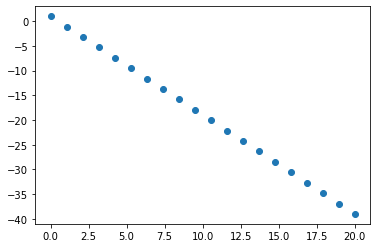

In [82]:
plt.scatter(X,y)

## Adagrad

### For a single variable linear regression ML model, build a function to find the optimum Theta_0 and Theta_1 parameters using Adagrad optimization algorithm.
#### The function should have the following input parameters:
##### 1. Input data as a matrix (or vector based on your data).
##### 2. Target label as a vector.
##### 3. Learning rate.
##### 4. Epsilon.
##### 5. Maximum number of iterations (Epochs).
#### The funtion should return the following outputs:
##### 1. All predicted Theta_0 in all iterations.
##### 2. All predicted Theta_1 in all iterations.
##### 3. Corresponding loss for each Theta_0 and Theta_1 predictions.
##### 4.All hypothesis outputs (prdicted labels) for each Theta_0 and Theta_1 predictions.
##### 5.Final Optimum values of Theta_0 and Theta_1.
#### Choose the suitable number of iterations, learning rate, Epsilon, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph), best fit line)
#### Try different values of the huperparameters and see the differnce in your results.

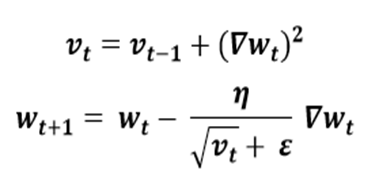

cost = 0


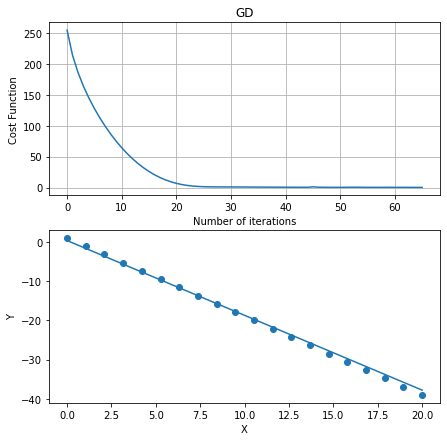

In [83]:
def LR_ADA_grad_single_variable(x_points,y_points,alpha,iterations,gamma,epsilon):
    m = len(y_points)
    theta0 = 0
    theta1 = 0
    x = np.ones(m).reshape(m,1)
    x = np.concatenate([x,x_points],axis=1)
    cost = []
    vt0 = 0
    vt1 = 0
    theta_0 = []
    theta_1 = []
    h = []
    for i in range(iterations):
        
        thetas = np.array([theta0,theta1]).reshape(1,2)
        Hypothesis = x@thetas.T
        J = np.sum((Hypothesis-y_points)**2) * (1/(2*m))
        vt0 = gamma*vt0 + (np.sum(Hypothesis-y_points) * (1/(m)))**2
        vt1 = gamma*vt1 + (np.sum((Hypothesis-y_points)*x_points) * (1/(m)))**2
        theta0 = theta0 - alpha*(np.sum(Hypothesis-y_points) * (1/(m))) * (1/((vt0**0.5)+epsilon))
        theta1 = theta1 - alpha*(np.sum((Hypothesis-y_points)*x_points) * (1/(m))) * (1/((vt1**0.5)+epsilon))
        theta_0.append(theta0)
        theta_1.append(theta1)
        cost.append(J)
        h.append(Hypothesis)
        if ((theta0)**2+(theta1)**2)**0.5<0.01:
            print('grad = 0')
            break
        elif (i>1):
            if np.linalg.norm(cost[i]-cost[i-1])<0.001:
                print('cost = 0')
                break
    fig = plt.figure(figsize=(7, 7))
    rows = 2
    columns = 1
    
    fig.add_subplot(rows, columns, 1)
    plt.ylabel("Cost Function")
    plt.xlabel("Number of iterations")
    plt.grid()
    plt.plot(cost)
    #plt.axis('off')
    plt.title("GD")
    
    fig.add_subplot(rows, columns, 2)
    plt.ylabel("Y")
    plt.xlabel("X")
    plt.scatter(x_points,y_points)
    plt.plot(x_points,Hypothesis)
    #plt.axis('off')
    
    return theta0,theta1,theta_0,theta_1,cost,h

gamma = 0.7
alpha = 0.15
epsilon = 1e-8

theta0,theta1,theta_0,theta_1,cost,h = LR_ADA_grad_single_variable(X,y,alpha,200,gamma,epsilon)

In [84]:
m = X.shape[0]
x_c = np.ones(m).reshape(m,1)
x_c = np.concatenate([x_c,X],axis=1) 
thetas = np.array([theta0,theta1]).reshape(1,2)
y_pred_GD = x_c@thetas.T
r2_score(y,y_pred_GD)

0.9972344766874999

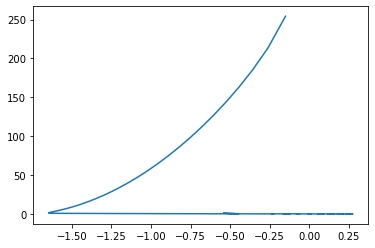

In [85]:
plt.plot(theta_0,cost)

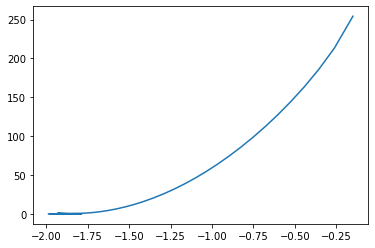

In [86]:
plt.plot(theta_1,cost)

In [87]:
theta1 = np.array(theta_1).reshape(1,len(theta_1))
x1 = X@theta1
theta0 = np.array(theta_0).reshape(1,len(theta_0))
x0 = X@theta0

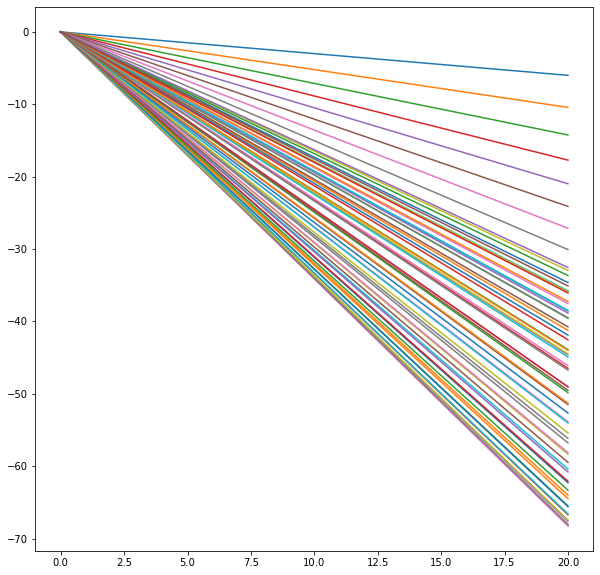

In [88]:
out = x0+x1
plt.figure(figsize=(10,10))
plt.plot(X,out)
plt.show()

value of theta: 
[[-2.0000002  -2.00000002]]
-----------------
r2_score: 
0.9389285531678528
*****************
*****************
value of theta: 
[[-1.7999998  -1.80000014]]
-----------------
r2_score: 
0.9856571438046471
*****************
*****************
cost = 0
value of theta: 
[[-1.59 -1.81]]
-----------------
r2_score: 
0.9877443214208433
*****************
*****************
grad = 0
value of theta: 
[[-0.001 -0.001]]
-----------------
r2_score: 
-2.445807499643128
*****************
*****************
cost = 0
value of theta: 
[[-1.22687022 -2.34292578]]
-----------------
r2_score: 
0.7535133705678468
*****************
*****************
cost = 0
value of theta: 
[[ 0.47483926 -2.01148667]]
-----------------
r2_score: 
0.9971873471353168
*****************
*****************
value of theta: 
[[-1.56458036 -1.81566374]]
-----------------
r2_score: 
0.9879754121769668
*****************
*****************
grad = 0
value of theta: 
[[-0.001 -0.001]]
-----------------
r2_score: 
-2.4458074

C:\Users\ghaidaa\AppData\Local\Temp/ipykernel_6808/648407753.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(7, 7))


value of theta: 
[[ 0.5948088  -2.00754018]]
-----------------
r2_score: 
0.9984184927855886
*****************
*****************
value of theta: 
[[-1.40737914 -1.40846167]]
-----------------
r2_score: 
0.8290149716328992
*****************
*****************
grad = 0
value of theta: 
[[-0.001 -0.001]]
-----------------
r2_score: 
-2.445807499643128
*****************
*****************
cost = 0
value of theta: 
[[ 0.23042467 -2.28222549]]
-----------------
r2_score: 
0.8925430363641195
*****************
*****************
cost = 0
value of theta: 
[[-0.29420568 -1.93789308]]
-----------------
r2_score: 
0.9959609891245367
*****************
*****************
value of theta: 
[[-1.25985782 -1.26077076]]
-----------------
r2_score: 
0.6846365319663997
*****************
*****************
grad = 0
value of theta: 
[[-0.001 -0.001]]
-----------------
r2_score: 
-2.445807499643128
*****************
*****************
cost = 0
value of theta: 
[[ 0.59228567 -2.26382999]]
-----------------
r2_score:

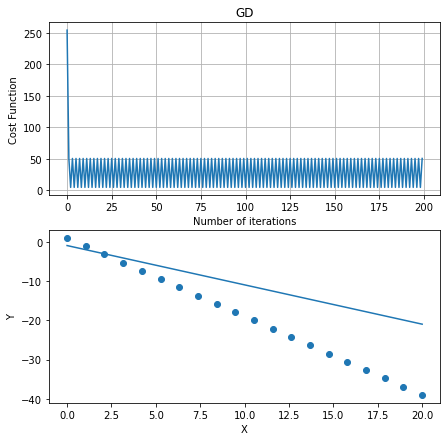

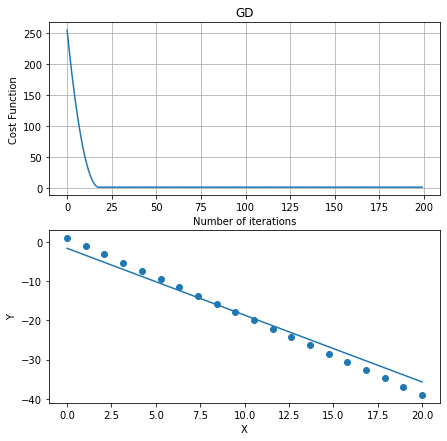

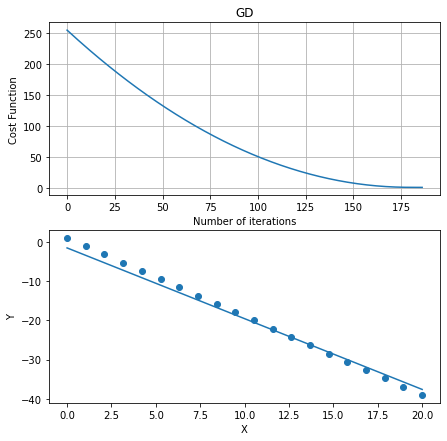

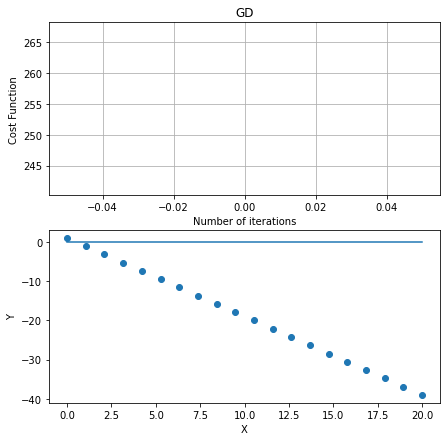

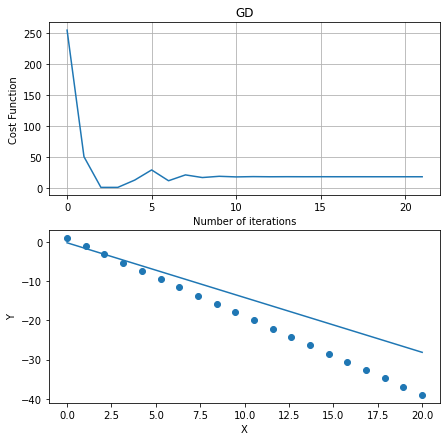

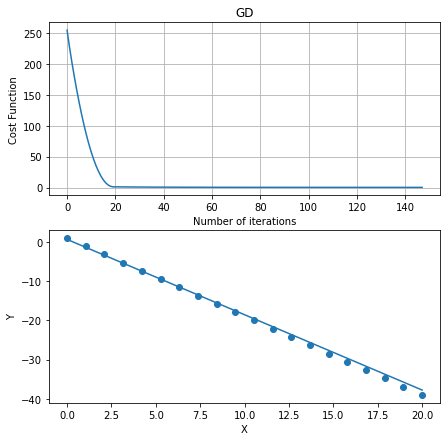

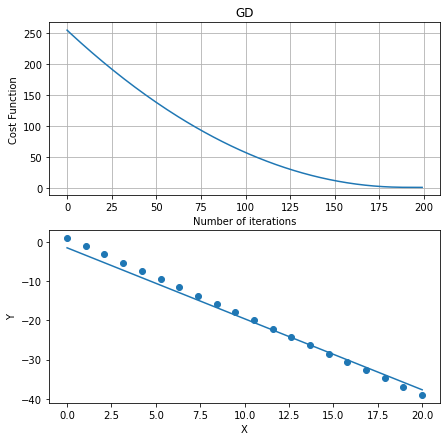

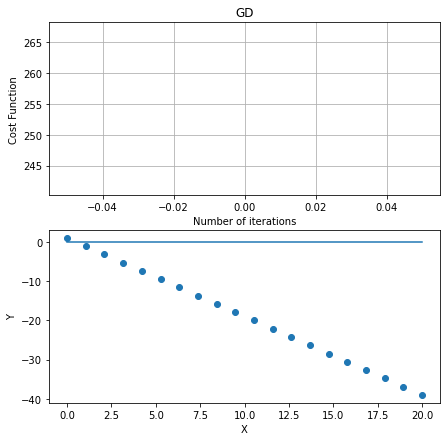

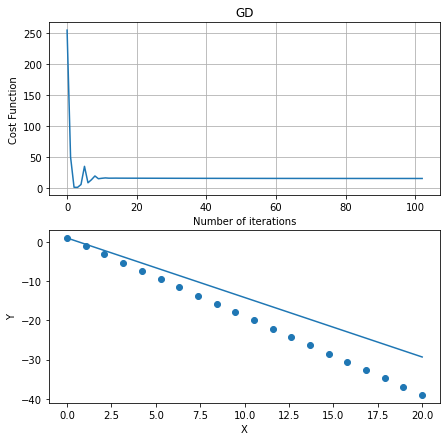

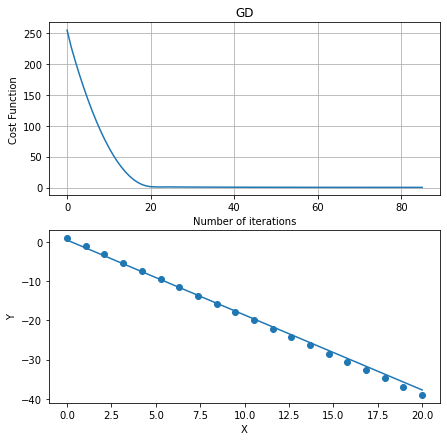

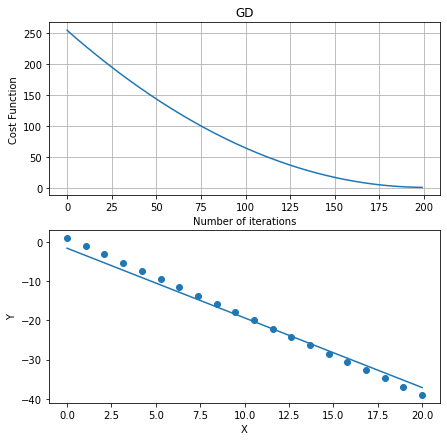

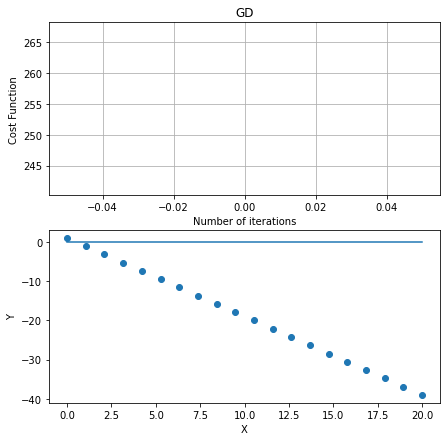

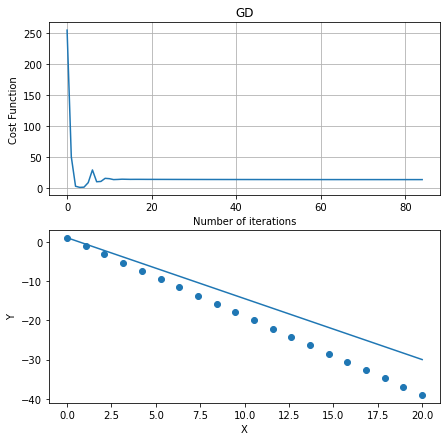

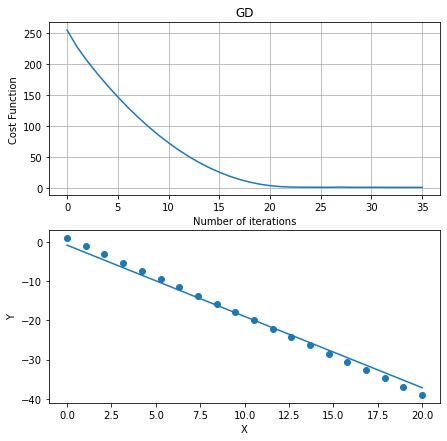

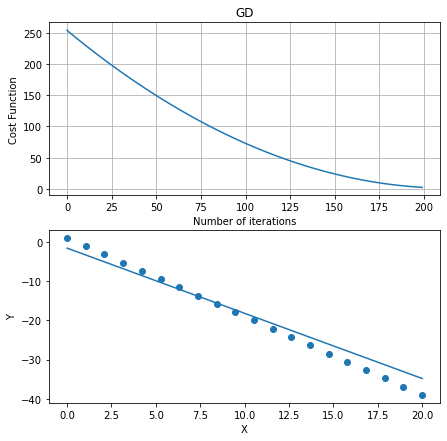

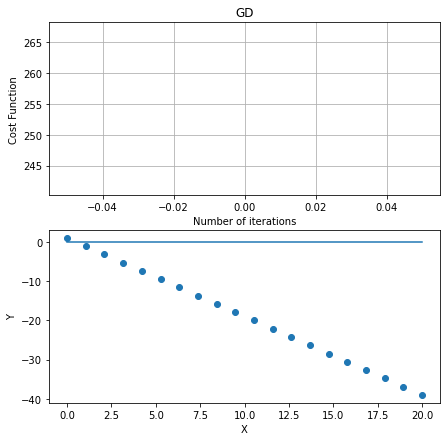

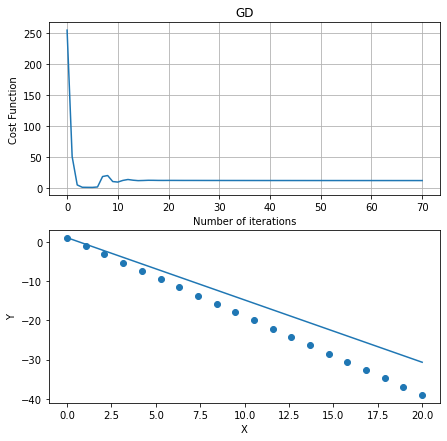

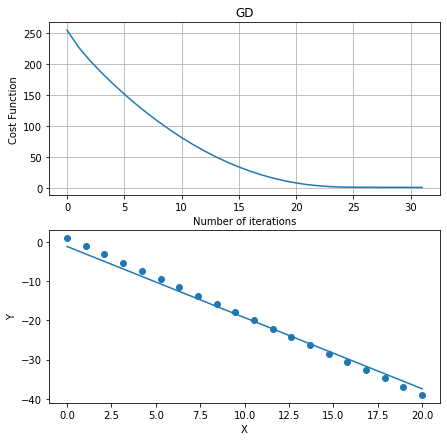

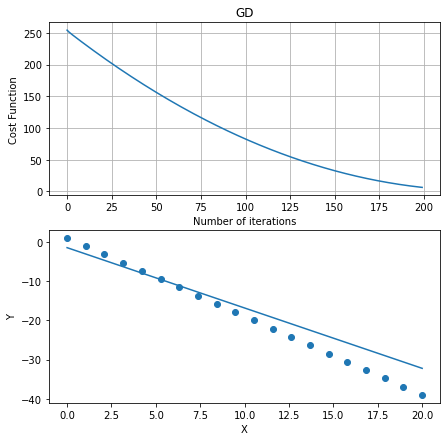

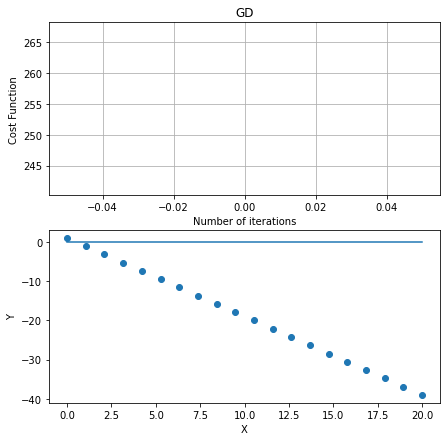

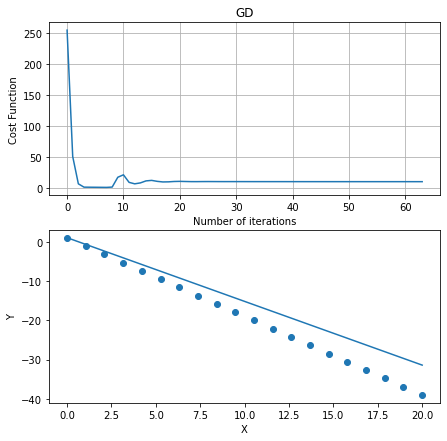

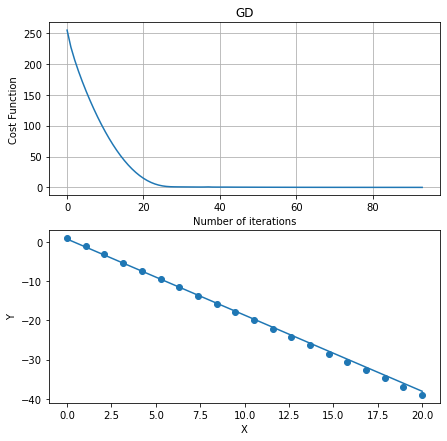

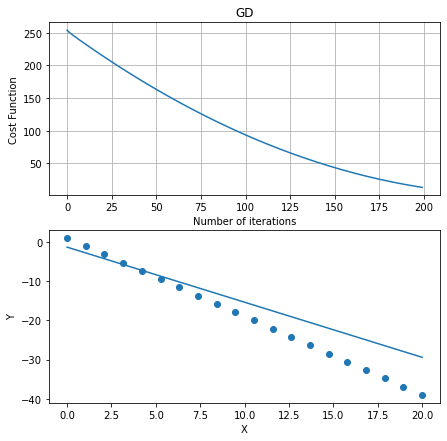

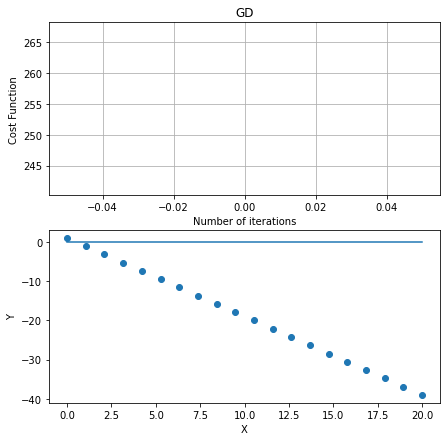

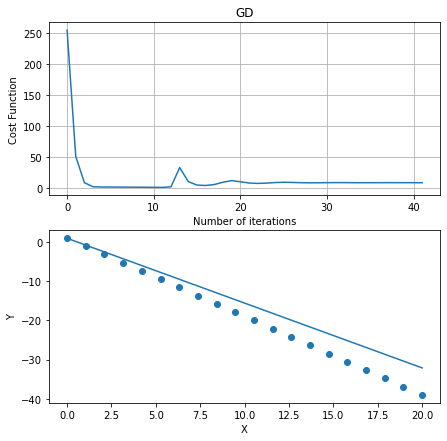

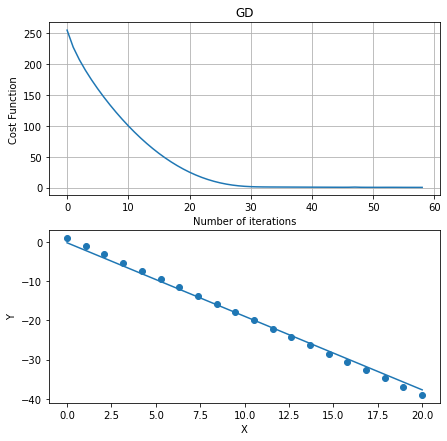

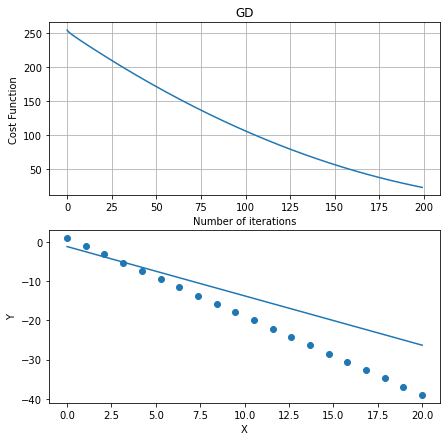

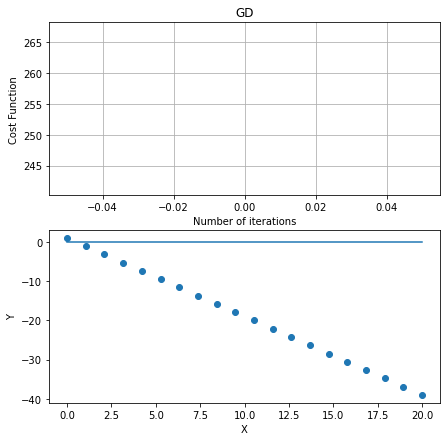

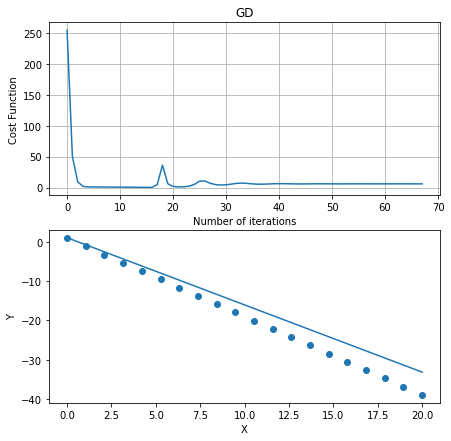

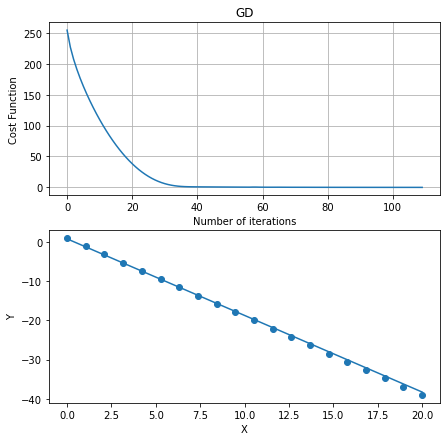

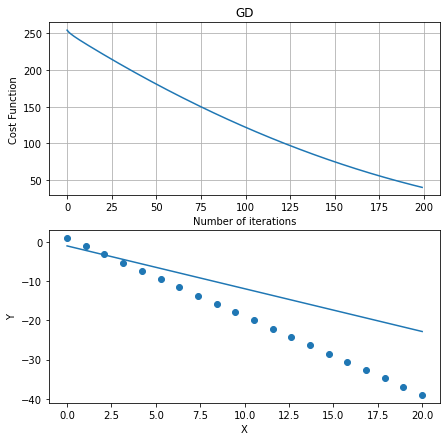

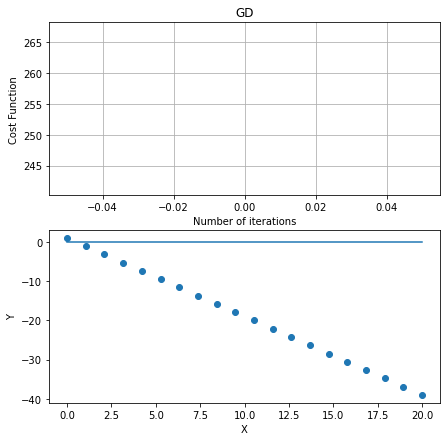

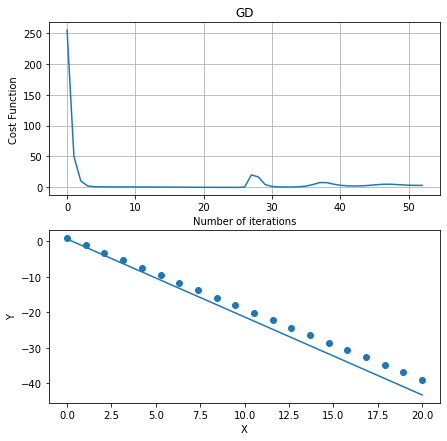

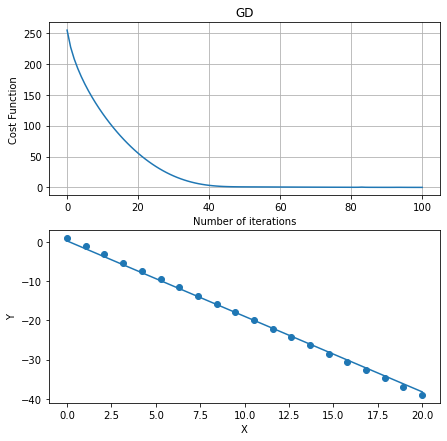

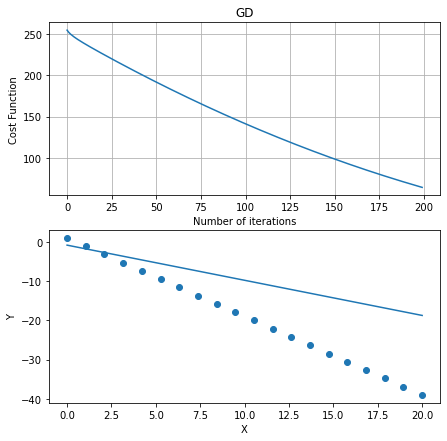

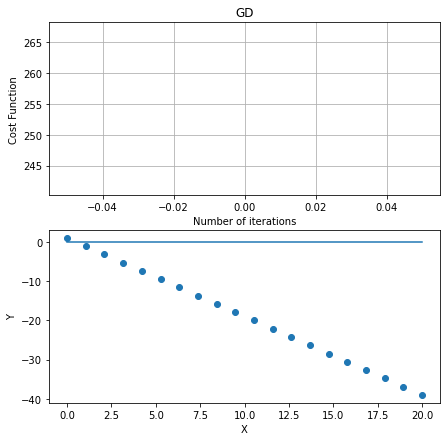

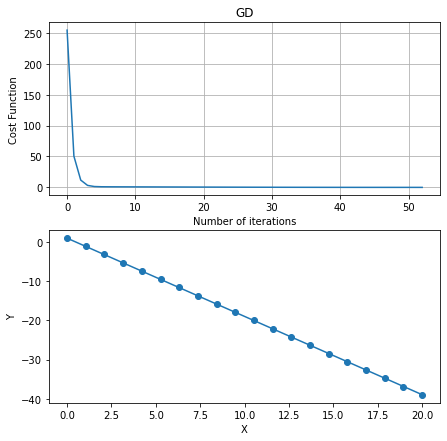

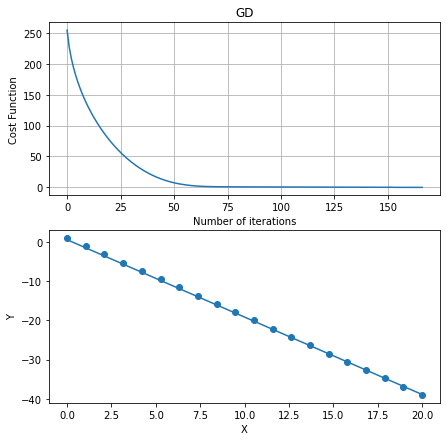

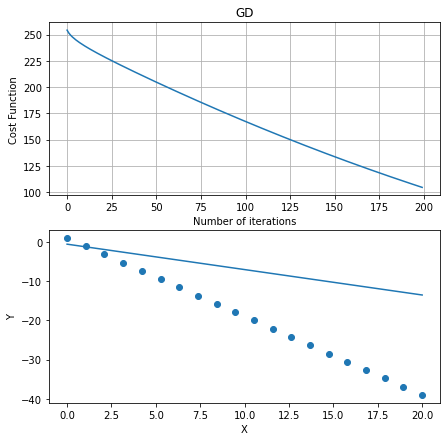

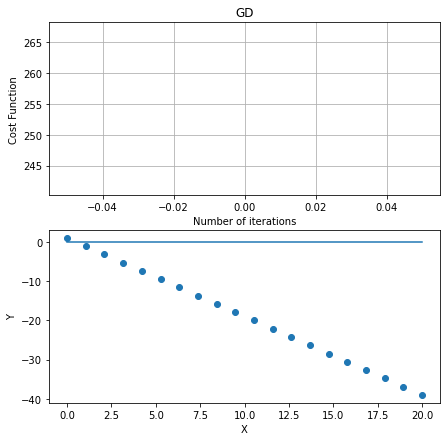

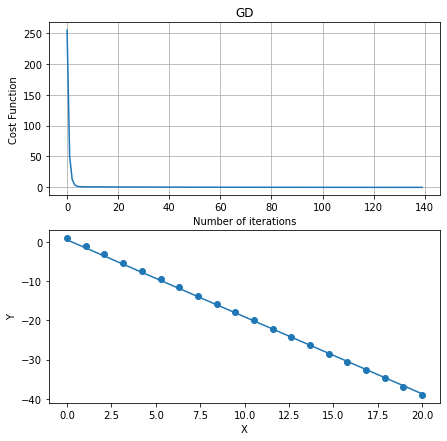

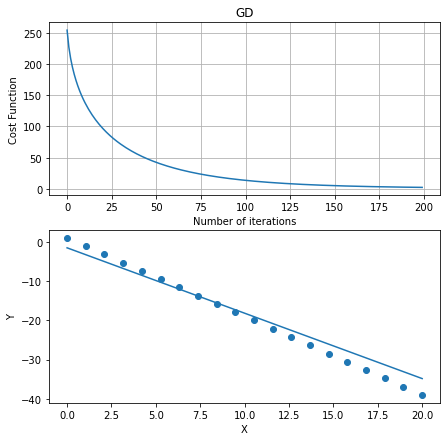

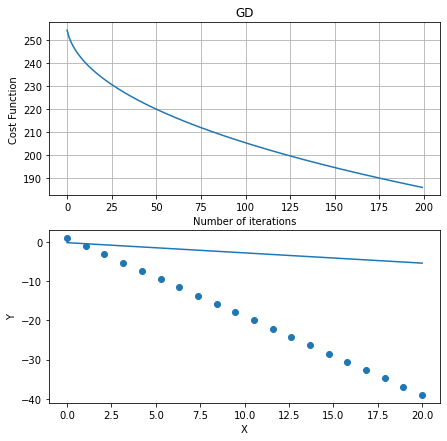

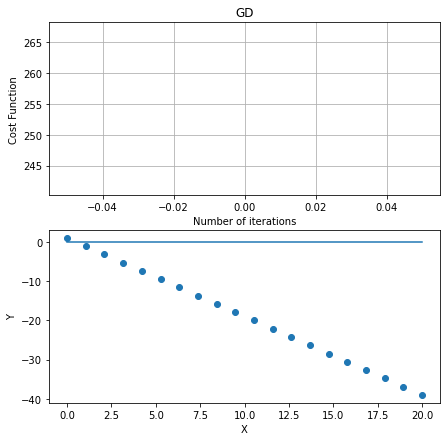

In [89]:
alphas = [1,0.1,0.01,0.001]
g = np.linspace(0,1,11)
max_r2 = 0 
for gamma in g:
    for alpha in alphas:
        theta0,theta1,theta_0,theta_1,cost,h = LR_ADA_grad_single_variable(X,y,alpha,200,gamma,epsilon)
        thetas = np.array([theta0,theta1]).reshape(1,2)
        print("value of theta: ")
        print(thetas)
        y_pred_GD = x_c@thetas.T
        print('-----------------')
        print('r2_score: ')
        r2 = r2_score(y,y_pred_GD)
        print(r2)
        print('*****************')
        print('*****************')
        if r2 > max_r2:
            max_r2 = r2
            best_gamma = gamma
            best_alpha = alpha

In [90]:
print('max r2: ',max_r2,' best gamma value: ',best_gamma,' best alpha value: ',best_alpha) 

max r2:  0.9999811633035118  best gamma value:  0.9  best alpha value:  1


## RMSProp

### Update the previos implementation to be RMSProp.
#### Compare your results with Adagrad results.

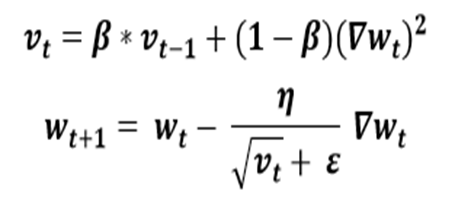

cost = 0


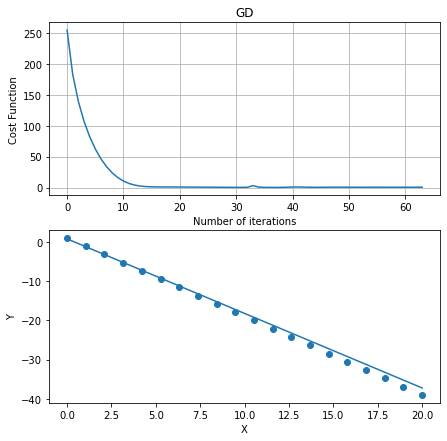

In [91]:
def LR_RMS_Prop_single_variable(x_points,y_points,alpha,iterations,gamma,epsilon):
    m = len(y_points)
    theta0 = 0
    theta1 = 0
    x = np.ones(m).reshape(m,1)
    x = np.concatenate([x,x_points],axis=1)
    cost = []
    vt0 = 0
    vt1 = 0
    theta_0 = []
    theta_1 = []
    h = []
    for i in range(iterations):
        
        thetas = np.array([theta0,theta1]).reshape(1,2)
        Hypothesis = x@thetas.T
        J = np.sum((Hypothesis-y_points)**2) * (1/(2*m))
        vt0 = gamma*vt0 + (1-gamma) * (np.sum(Hypothesis-y_points) * (1/(2*m)))**2
        vt1 = gamma*vt1 + (1-gamma) * (np.sum((Hypothesis-y_points)*x_points) * (1/(2*m)))**2
        theta0 = theta0 - alpha*(np.sum(Hypothesis-y_points) * (1/(2*m))) * (1/((vt0**0.5)+epsilon))
        theta1 = theta1 - alpha*(np.sum((Hypothesis-y_points)*x_points) * (1/(2*m))) * (1/((vt1**0.5)+epsilon))
        cost.append(J)
        theta_0.append(theta0)
        theta_1.append(theta1)
        h.append(Hypothesis)
        if ((theta0)**2+(theta1)**2)**0.5<0.01:
            print('grad = 0')
            break
        elif (i>1):
            if np.linalg.norm(cost[i]-cost[i-1])<0.001:
                print('cost = 0')
                break
    fig = plt.figure(figsize=(7, 7))
    rows = 2
    columns = 1
    
    fig.add_subplot(rows, columns, 1)
    plt.ylabel("Cost Function")
    plt.xlabel("Number of iterations")
    plt.grid()
    plt.plot(cost)
    #plt.axis('off')
    plt.title("GD")
    
    fig.add_subplot(rows, columns, 2)
    plt.ylabel("Y")
    plt.xlabel("X")
    plt.scatter(x_points,y_points)
    plt.plot(x_points,Hypothesis)
    #plt.axis('off')
    
    return theta0,theta1,theta_0,theta_1,cost,h

gamma = 0.7
alpha = 0.15
epsilon = 1e-8

theta0,theta1,theta_0,theta_1,cost,h = LR_RMS_Prop_single_variable(X,y,alpha,200,gamma,epsilon)

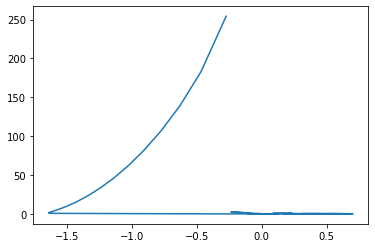

In [92]:
plt.plot(theta_0,cost)

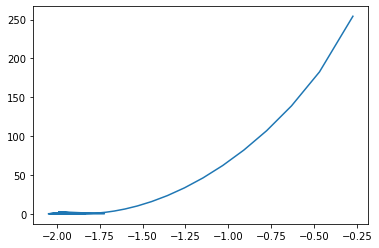

In [93]:
plt.plot(theta_1,cost)

In [94]:
theta1 = np.array(theta_1).reshape(1,len(theta_1))
x1 = X@theta1
theta0 = np.array(theta_0).reshape(1,len(theta_0))
x0 = X@theta0

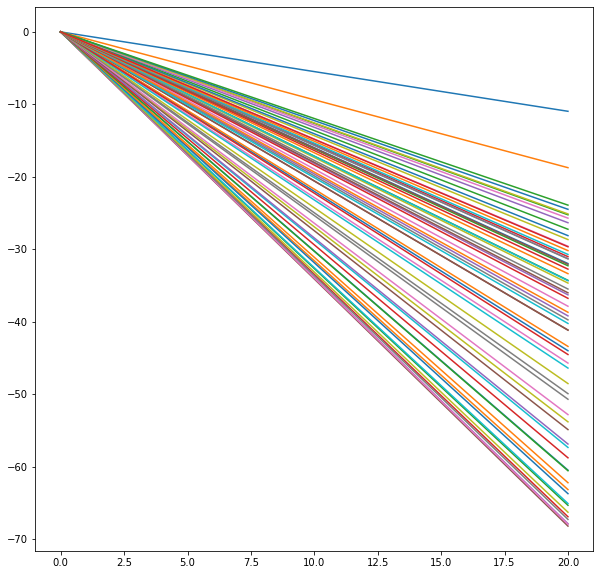

In [95]:
out = x0+x1
plt.figure(figsize=(10,10))
plt.plot(X,out)
plt.show()

value of theta: 
[[-2.0000002  -2.00000002]]
-----------------
r2_score: 
0.9389285531678528
*****************
*****************
value of theta: 
[[-1.7999998  -1.80000014]]
-----------------
r2_score: 
0.9856571438046471
*****************
*****************
cost = 0
value of theta: 
[[-1.59 -1.81]]
-----------------
r2_score: 
0.9877443214208433
*****************
*****************
grad = 0
value of theta: 
[[-0.001 -0.001]]
-----------------
r2_score: 
-2.445807499643128
*****************
*****************
cost = 0
value of theta: 
[[-1.22687022 -2.34292578]]
-----------------
r2_score: 
0.7535133705678468
*****************
*****************
cost = 0
value of theta: 
[[ 0.47483926 -2.01148667]]
-----------------
r2_score: 
0.9971873471353168
*****************
*****************
value of theta: 
[[-1.56458036 -1.81566374]]
-----------------
r2_score: 
0.9879754121769668
*****************
*****************
grad = 0
value of theta: 
[[-0.001 -0.001]]
-----------------
r2_score: 
-2.4458074

C:\Users\ghaidaa\AppData\Local\Temp/ipykernel_6808/648407753.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(7, 7))


value of theta: 
[[ 0.23042467 -2.28222549]]
-----------------
r2_score: 
0.8925430363641195
*****************
*****************
cost = 0
value of theta: 
[[-0.29420568 -1.93789308]]
-----------------
r2_score: 
0.9959609891245367
*****************
*****************
value of theta: 
[[-1.25985782 -1.26077076]]
-----------------
r2_score: 
0.6846365319663997
*****************
*****************
grad = 0
value of theta: 
[[-0.001 -0.001]]
-----------------
r2_score: 
-2.445807499643128
*****************
*****************
cost = 0
value of theta: 
[[ 0.59228567 -2.26382999]]
-----------------
r2_score: 
0.9196392034878825
*****************
*****************
cost = 0
value of theta: 
[[ 0.66965019 -2.00461884]]
-----------------
r2_score: 
0.9990325813120075
*****************
*****************
value of theta: 
[[-1.09336958 -1.09416543]]
-----------------
r2_score: 
0.4656848731314783
*****************
*****************
grad = 0
value of theta: 
[[-0.001 -0.001]]
-----------------
r2_score:

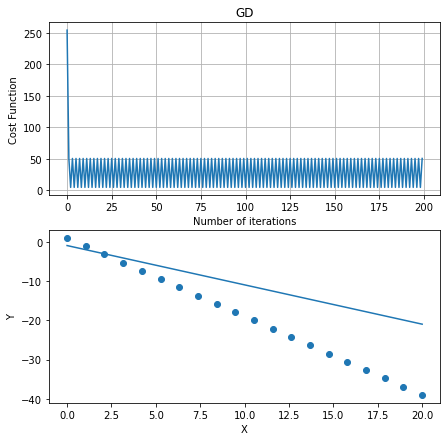

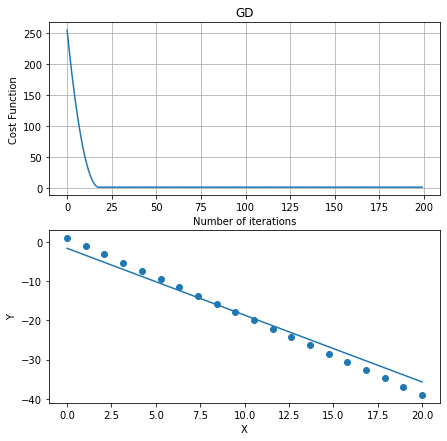

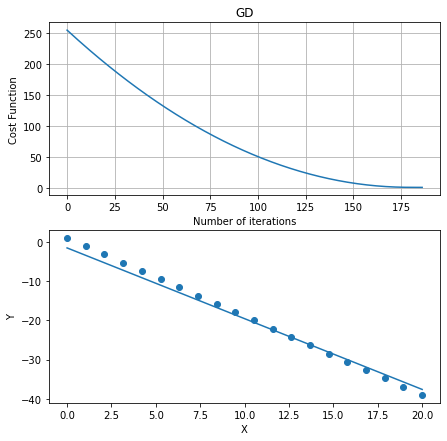

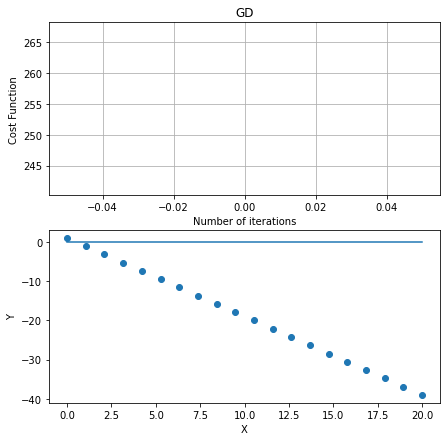

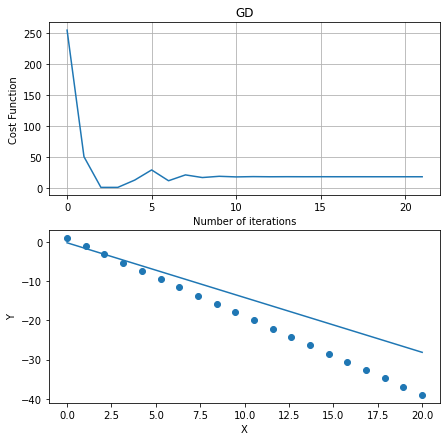

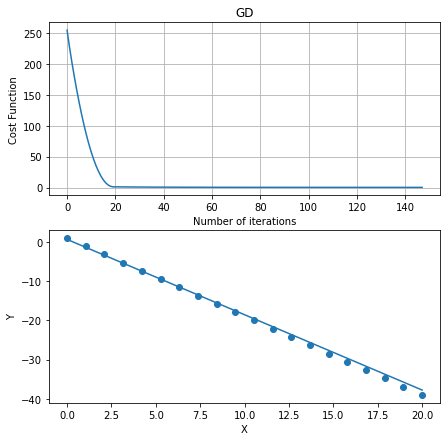

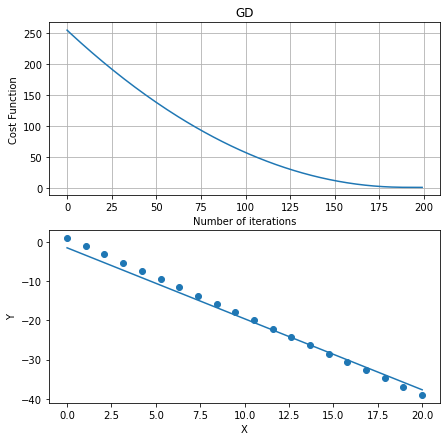

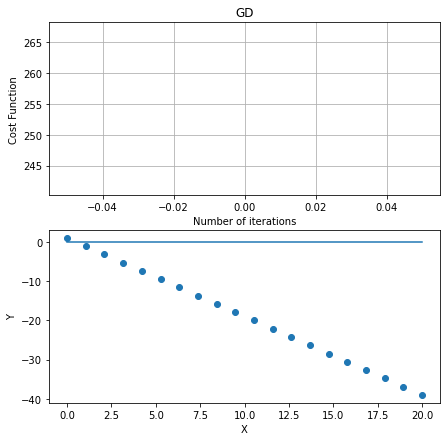

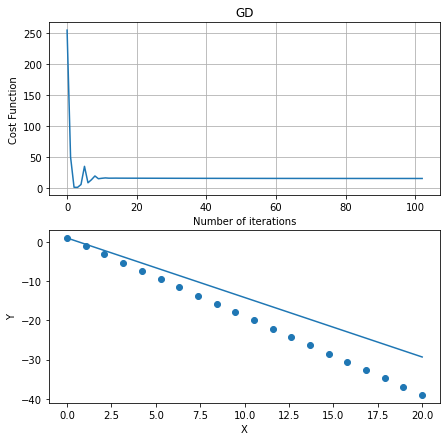

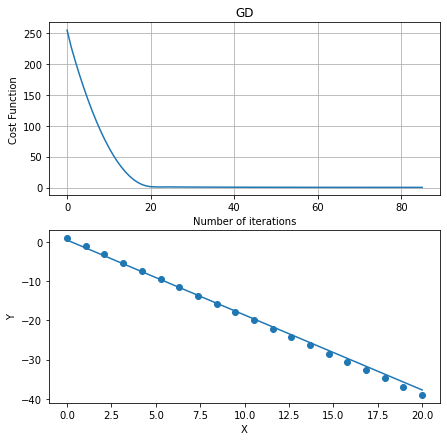

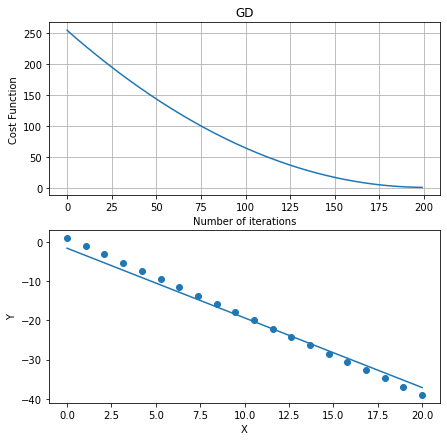

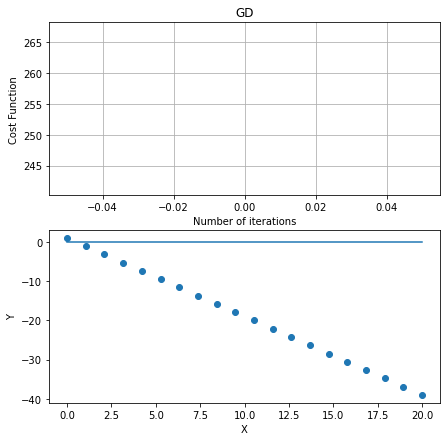

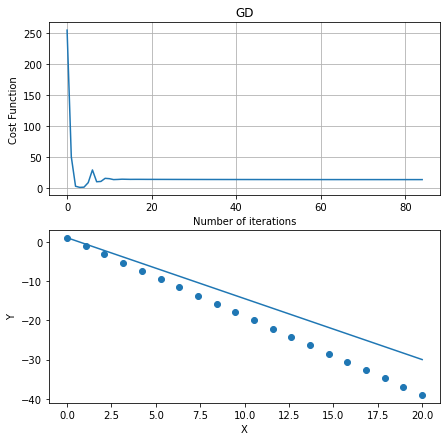

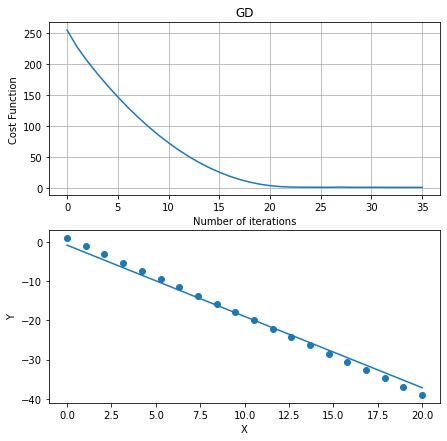

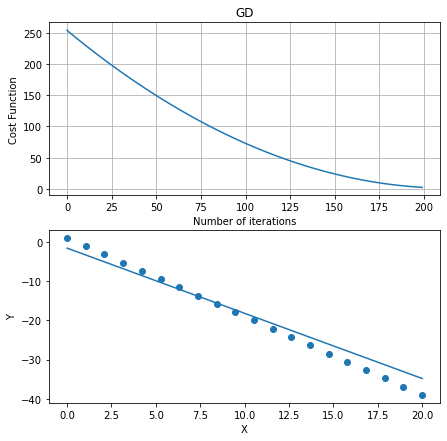

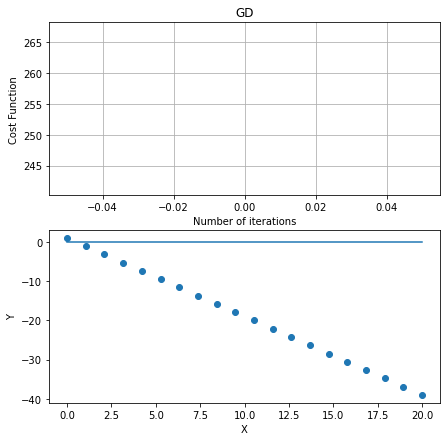

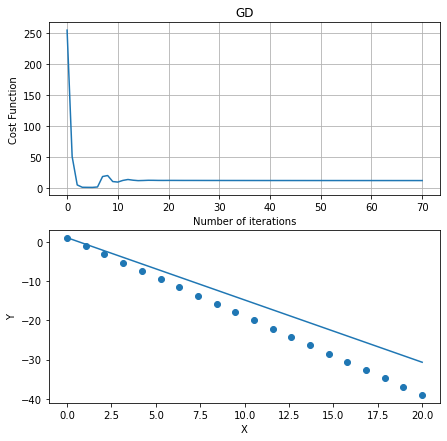

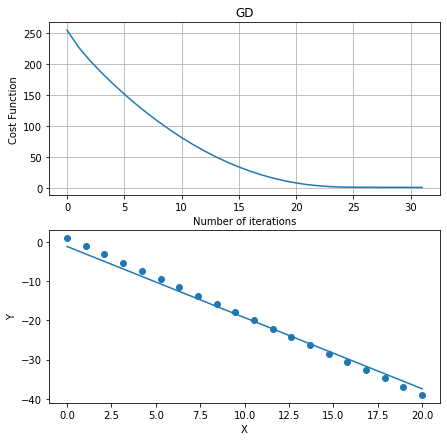

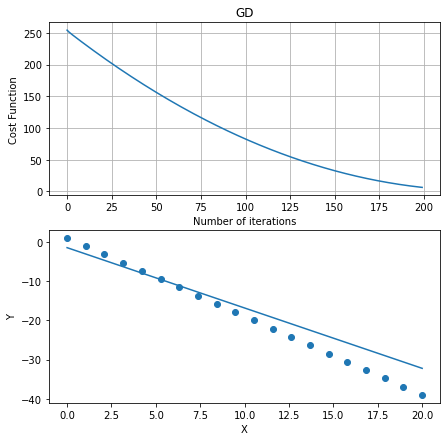

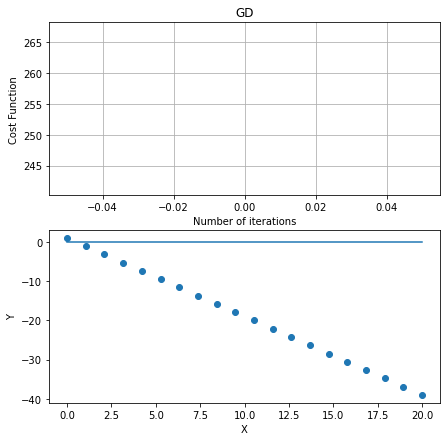

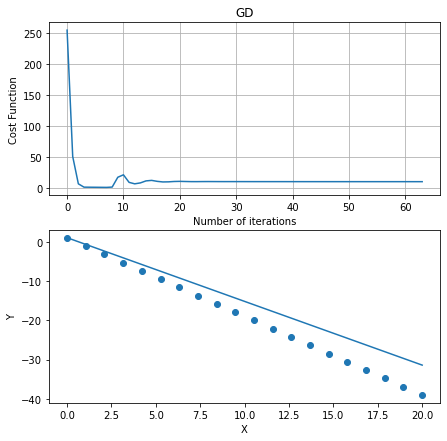

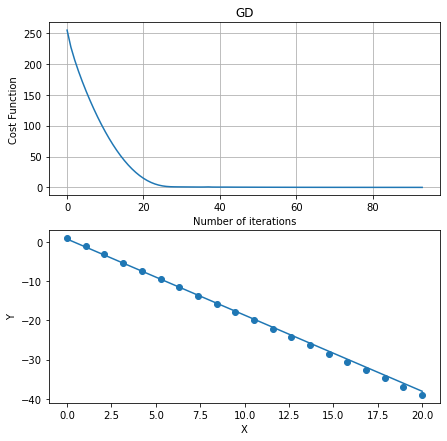

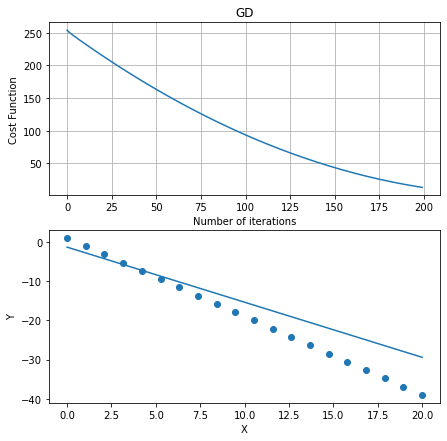

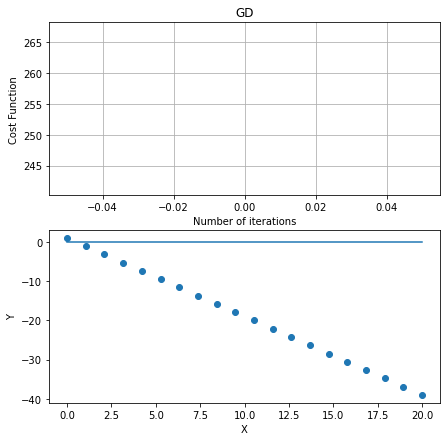

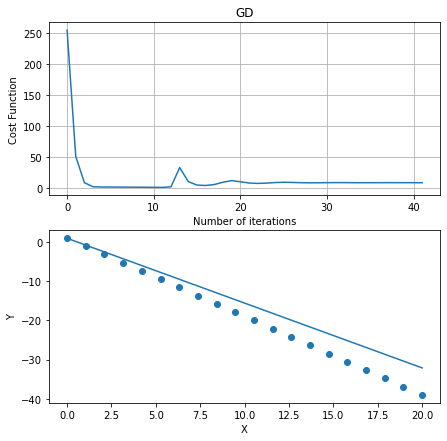

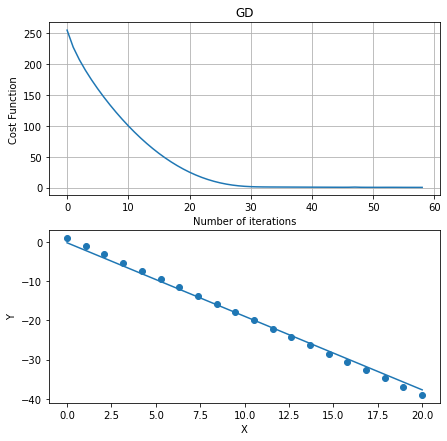

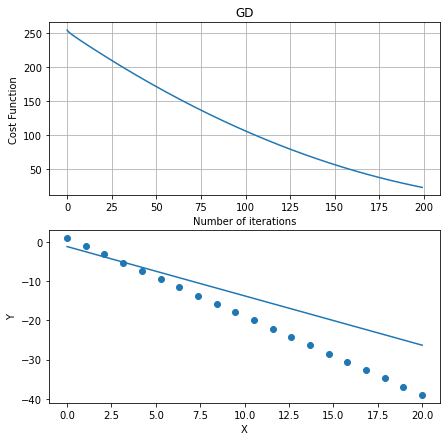

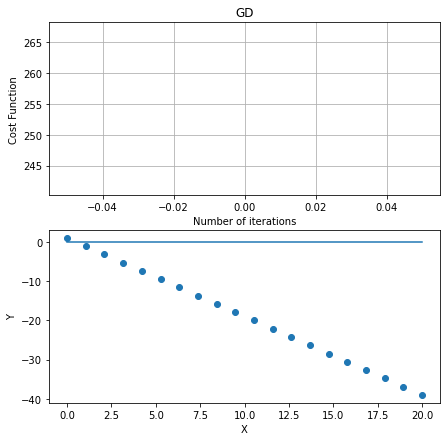

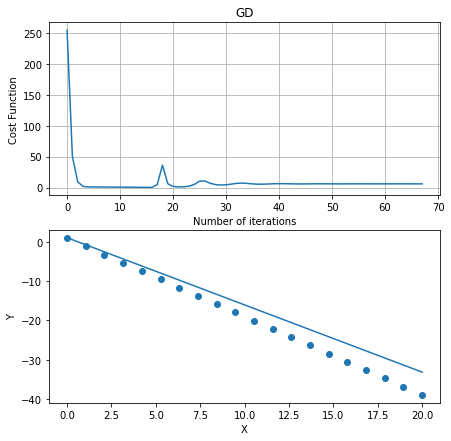

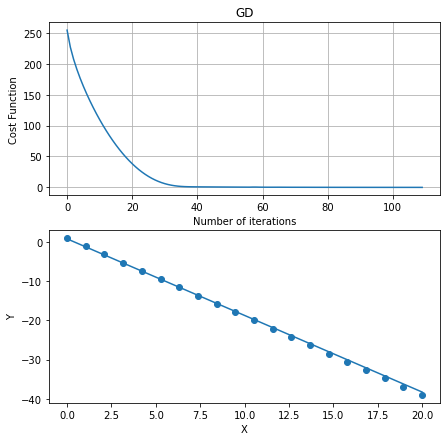

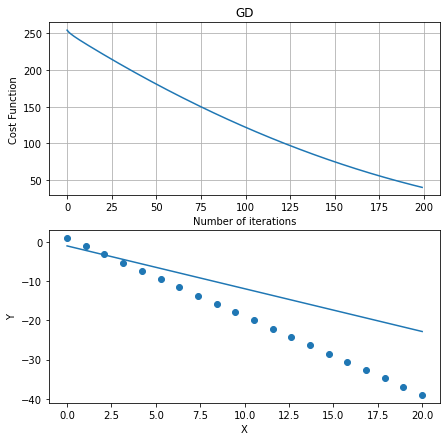

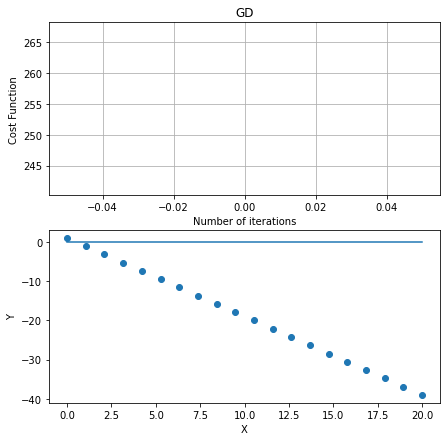

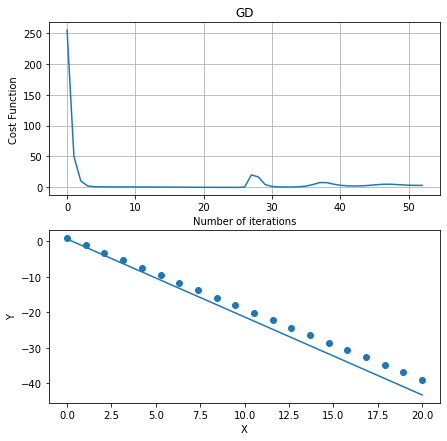

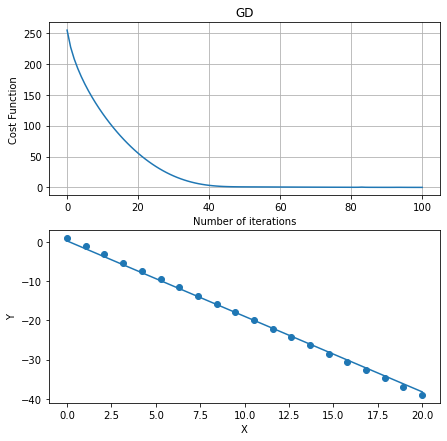

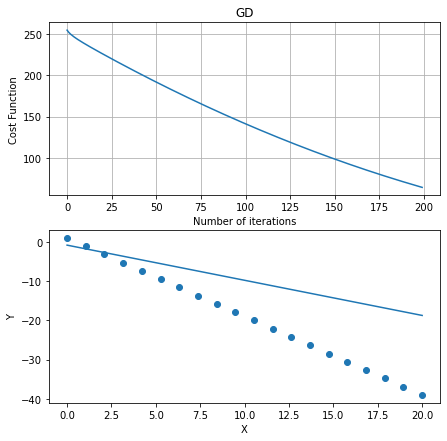

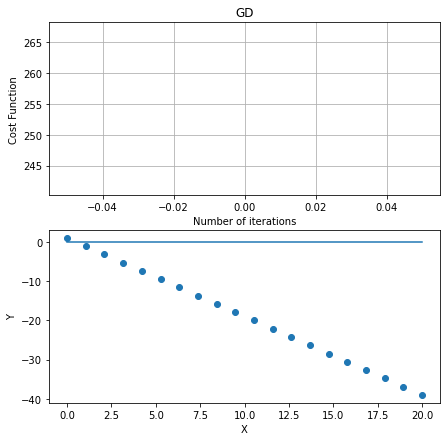

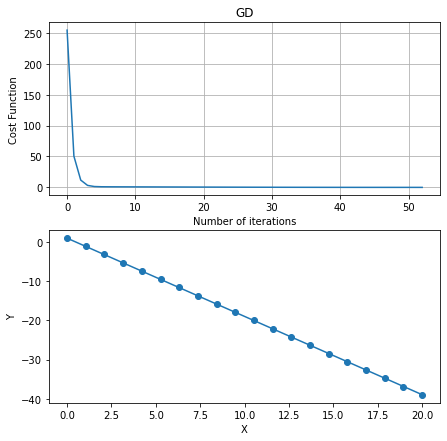

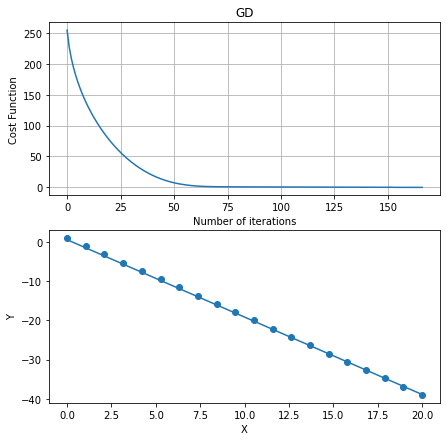

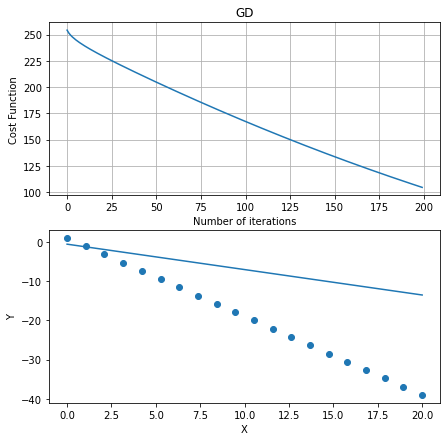

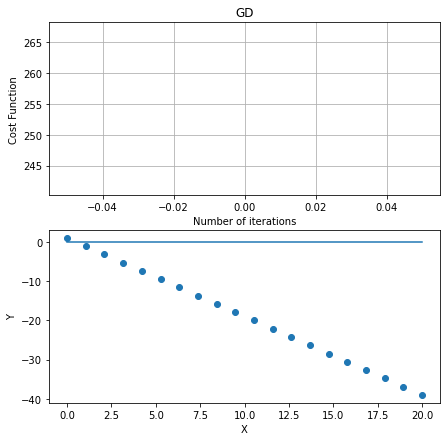

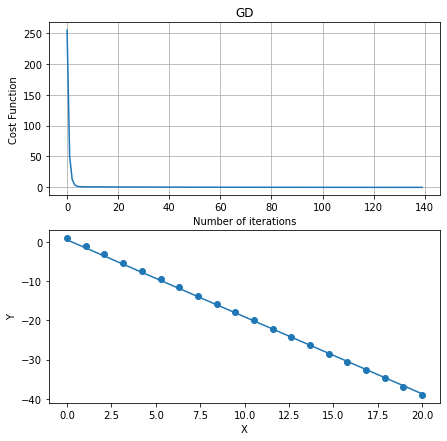

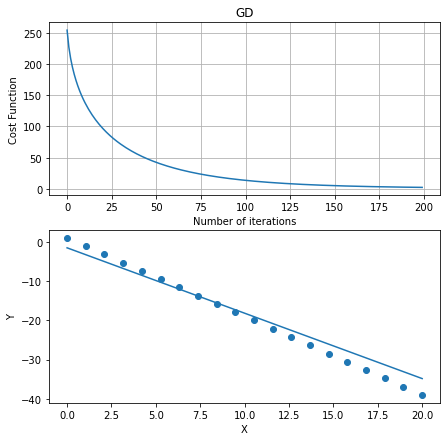

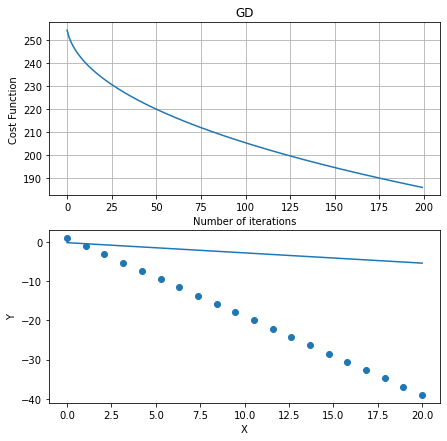

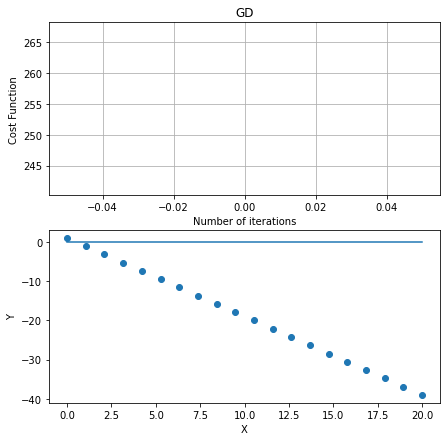

In [96]:
alphas = [1,0.1,0.01,0.001]
g = np.linspace(0,1,11)
max_r2 = 0 
for gamma in g:
    for alpha in alphas:
        theta0,theta1,theta_0,theta_1,cost,h = LR_ADA_grad_single_variable(X,y,alpha,200,gamma,epsilon)
        thetas = np.array([theta0,theta1]).reshape(1,2)
        print("value of theta: ")
        print(thetas)
        y_pred_GD = x_c@thetas.T
        print('-----------------')
        print('r2_score: ')
        r2 = r2_score(y,y_pred_GD)
        print(r2)
        print('*****************')
        print('*****************')
        if r2 > max_r2:
            max_r2 = r2
            best_gamma = gamma
            best_alpha = alpha

In [97]:
print('max r2: ',max_r2,' best gamma value: ',best_gamma,' best alpha value: ',best_alpha) 

max r2:  0.9999811633035118  best gamma value:  0.9  best alpha value:  1


## Adam

### Update the previos implementation to be Adam.
#### Compare your results with Adagrad and RMSProp results.

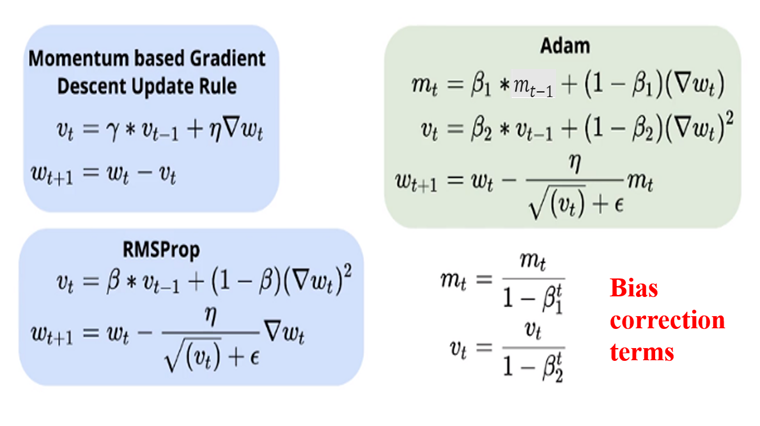

cost = 0


(-1.572555048256214, -1.7956688757595842)

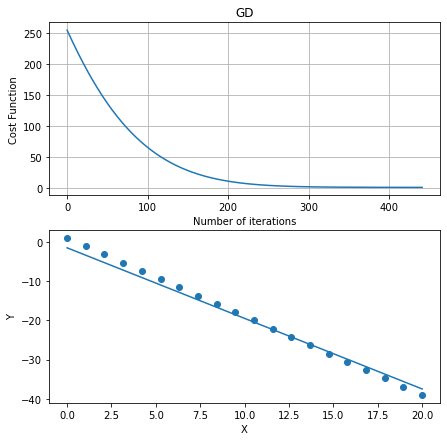

In [122]:
def LR_Adam_single_variable(x_points,y_points,alpha,iterations,epsilon,beta1,beta2):
    m = len(y_points)
    theta0 = 0
    theta1 = 0
    x_c = np.ones(m).reshape(m,1)
    x_c = np.concatenate([x_c,x_points],axis=1) 
    cost = np.zeros(iterations)
    thetas = np.array([theta0,theta1]).reshape(1,2)
    vt = np.array([0,0]).reshape(1,2)
    mt = np.array([0,0]).reshape(1,2)
    mt_ = np.array([0,0]).reshape(1,2)
    vt_ = np.array([0,0]).reshape(1,2)
    theta_0 = []
    theta_1 = []
    h = []
    for i in range(iterations):
        #thetas = np.array([theta0,theta1]).reshape(1,2)
        Hypothesis = x_c@thetas.T
        J = (Hypothesis-y_points).T@(Hypothesis-y_points) * (1/(2*m))
        mt = beta1*mt + (1-beta1) * (((Hypothesis-y_points).T)@x_c) * (1/m)
        vt = beta2*vt + (1-beta2) * (((Hypothesis-y_points).T)@x_c* (1/(m)))**2
        beta1t = beta1**(i+1)
        beta2t = beta2**(i+1)
        mt_ = mt/(1-beta1t)
        vt_ = vt/(1-beta2t)
        thetas = thetas - alpha*mt_*(1/((vt_**0.5)+epsilon))
        cost[i] = J
        theta_0.append(thetas[0,0])
        theta_1.append(thetas[0,1])
        h.append(Hypothesis)
        if np.linalg.norm(thetas)<0.01:
            print('grad = 0')
            break
        elif (i>1):
            if np.linalg.norm(cost[i]-cost[i-1])<0.001:
                print('cost = 0')
                break

    cost = cost[:i+1]
    fig = plt.figure(figsize=(7, 7))
    rows = 2
    columns = 1
    fig.add_subplot(rows, columns, 1)
    plt.ylabel("Cost Function")
    plt.xlabel("Number of iterations")
    plt.grid()
    plt.plot(cost)
    #plt.axis('off')
    plt.title("GD")
    
    fig.add_subplot(rows, columns, 2)
    plt.ylabel("Y")
    plt.xlabel("X")
    plt.scatter(x_points,y_points)
    plt.plot(x_points,Hypothesis)
    #plt.axis('off')
    return thetas[0,0],thetas[0,1],theta_0,theta_1,cost,h
beta1 = 0.9
beta2 = 0.999
alpha = 0.01
epsilon = 1e-8

theta0,theta1,theta_0,theta_1,cost,h = LR_Adam_single_variable(X,y,alpha,2500,epsilon,beta1,beta2)
theta0,theta1

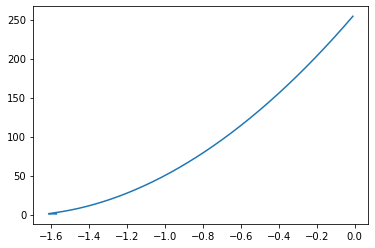

In [123]:
plt.plot(theta_0,cost)

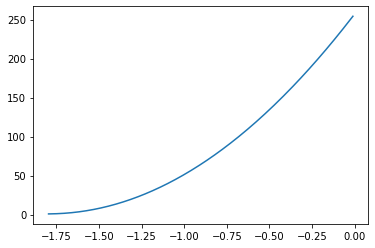

In [124]:
plt.plot(theta_1,cost)

In [125]:
theta1 = np.array(theta_1).reshape(1,len(theta_1))
x1 = X@theta1
theta0 = np.array(theta_0).reshape(1,len(theta_0))
x0 = X@theta0

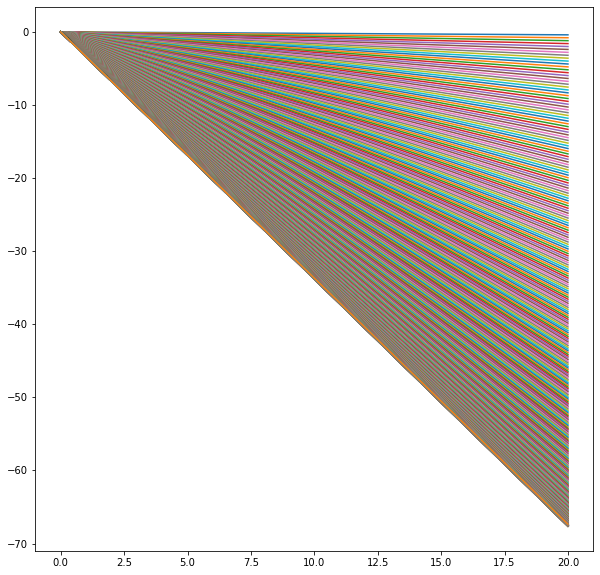

In [126]:
out = x0+x1
plt.figure(figsize=(10,10))
plt.plot(X,out)
plt.show()

cost = 0
value of theta: 
1.0369024936416475 -1.963087362163521
-----------------
cost function: 
0.01775725284378242
*****************
*****************
cost = 0
value of theta: 
0.9931329626281717 -1.9942456126025818
-----------------
cost function: 
0.00018127475270840847
*****************
*****************
cost = 0
value of theta: 
1.0559112279835847 -1.9923986178546989
-----------------
cost function: 
0.002111577858624825
*****************
*****************
cost = 0
value of theta: 
0.698914847958927 -1.958168733592783
-----------------
cost function: 
0.023790298626648432
*****************
*****************
cost = 0
value of theta: 
-1.2479990076892837 -1.847798880090532
-----------------
cost function: 
0.6892904004933268
*****************
*****************
cost = 0
value of theta: 
-1.3587059866773281 -1.7505897560581702
-----------------
cost function: 
1.1674724910201817
*****************
*****************
cost = 0
value of theta: 
0.6409596518687725 -1.9732952325077369
----

C:\Users\ghaidaa\AppData\Local\Temp/ipykernel_6808/3623194996.py:40: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(7, 7))


value of theta: 
-0.0009999999994736843 -0.0009999999999620761
-----------------
cost function: 
254.18421052631575
*****************
*****************
grad = 0
value of theta: 
-0.0009999999994736843 -0.0009999999999620761
-----------------
cost function: 
254.18421052631575
*****************
*****************
grad = 0
value of theta: 
-0.0009999999994736843 -0.0009999999999620761
-----------------
cost function: 
254.18421052631575
*****************
*****************
grad = 0
value of theta: 
0.0 0.0
-----------------
cost function: 
254.18421052631575
*****************
*****************
grad = 0
value of theta: 
0.0 0.0
-----------------
cost function: 
254.18421052631575
*****************
*****************
grad = 0
value of theta: 
0.0 0.0
-----------------
cost function: 
254.18421052631575
*****************
*****************
value of theta: 
4.758245995241008 1.998465530802193
-----------------
cost function: 
1130.5217549556419
*****************
*****************
value of theta:

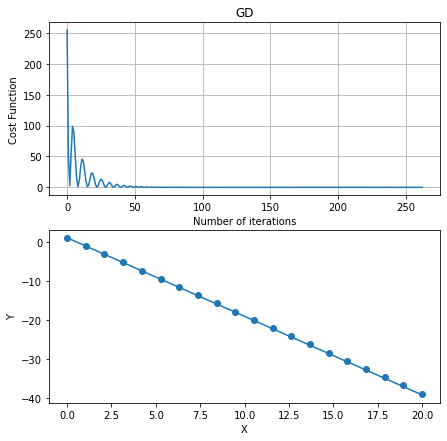

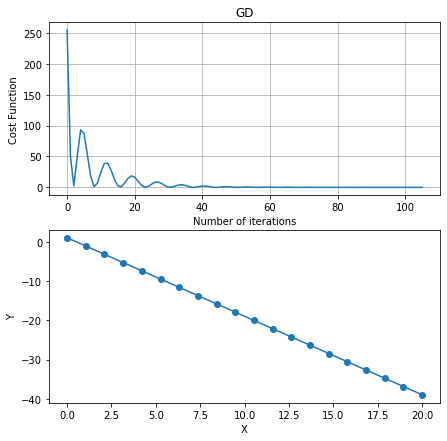

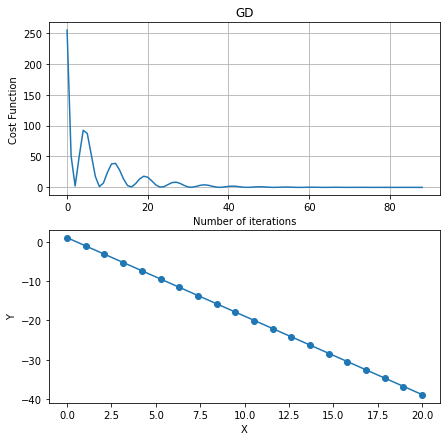

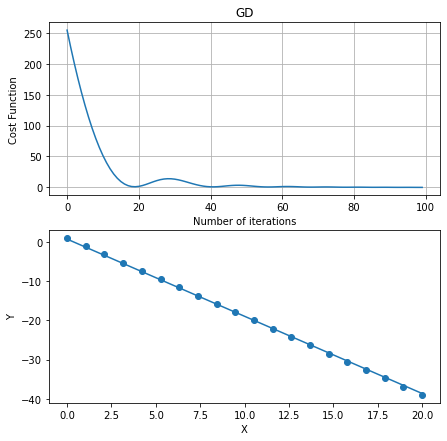

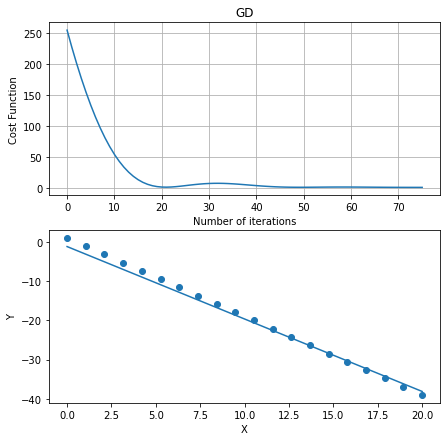

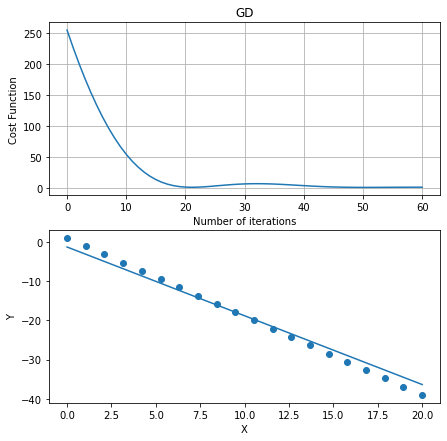

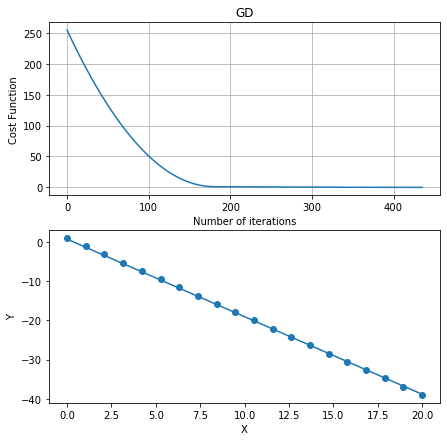

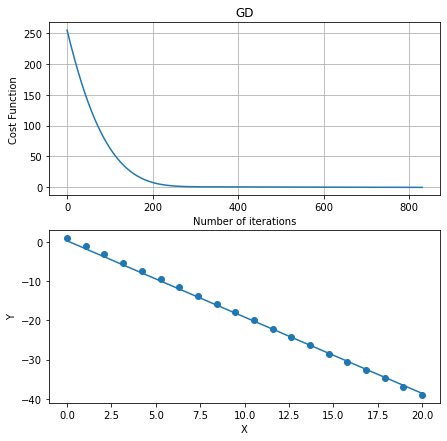

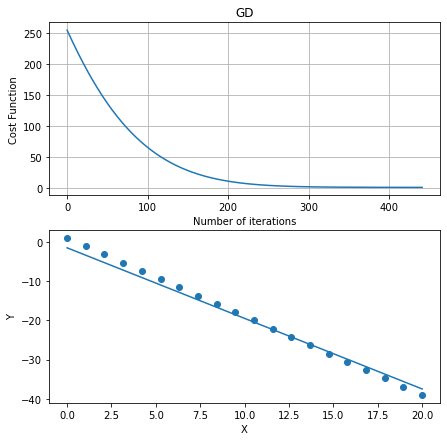

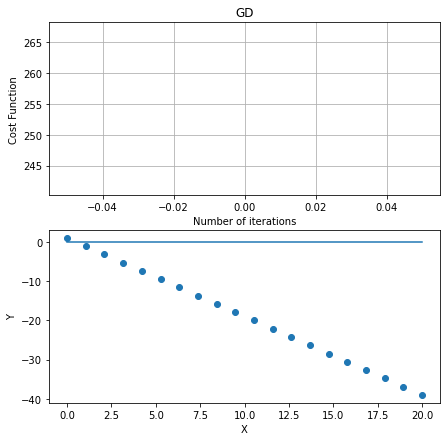

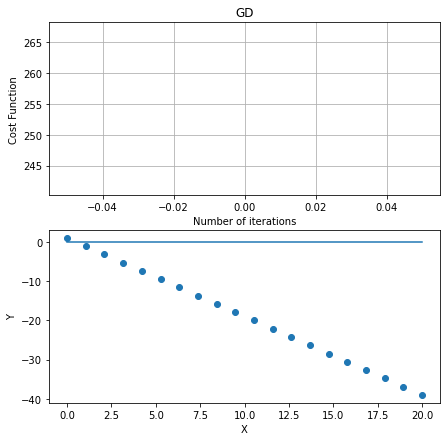

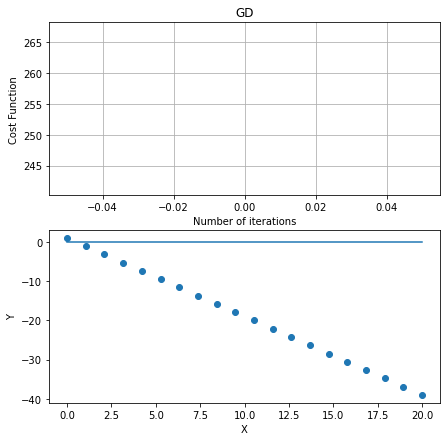

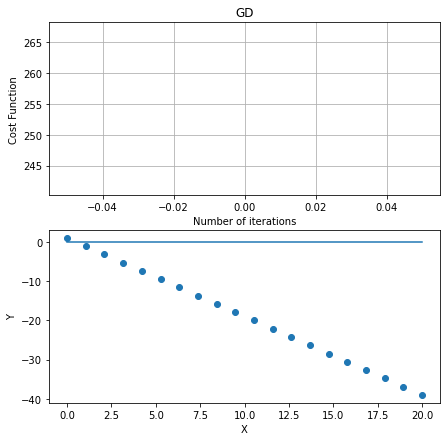

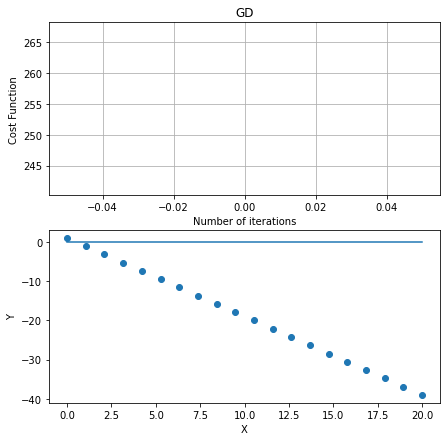

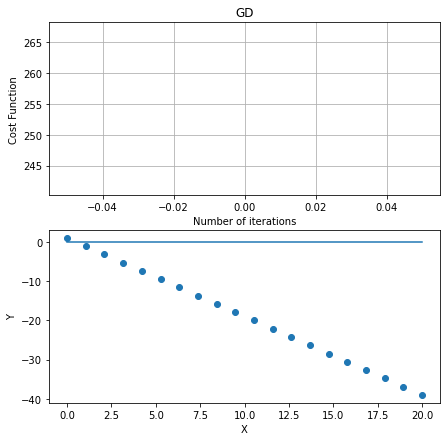

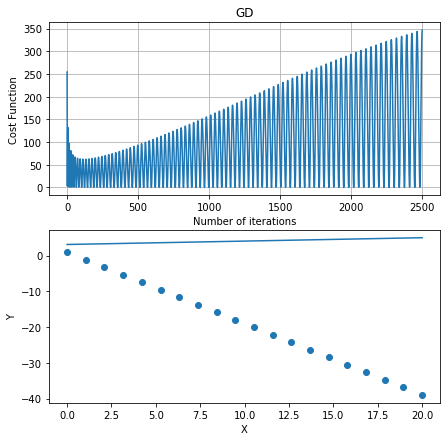

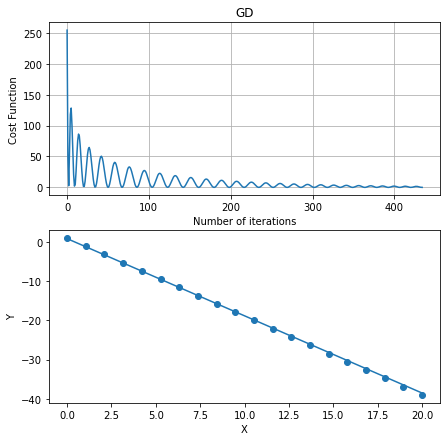

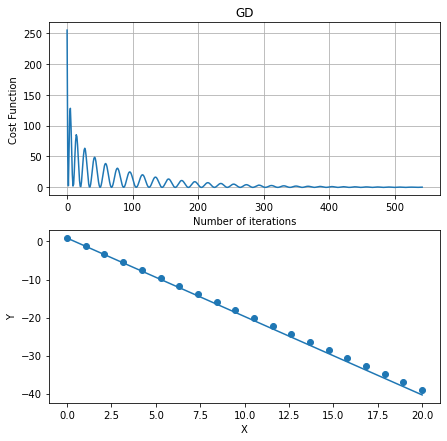

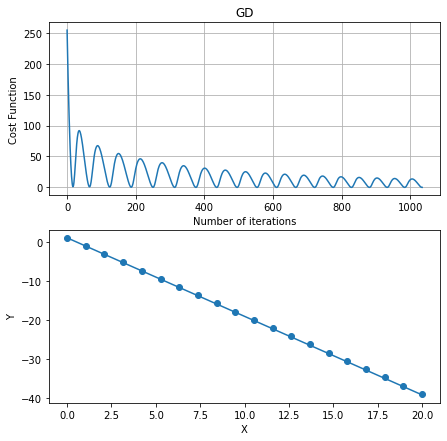

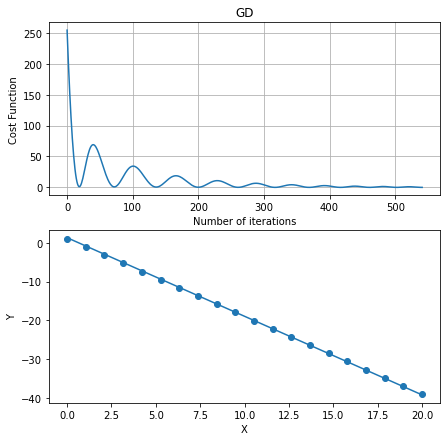

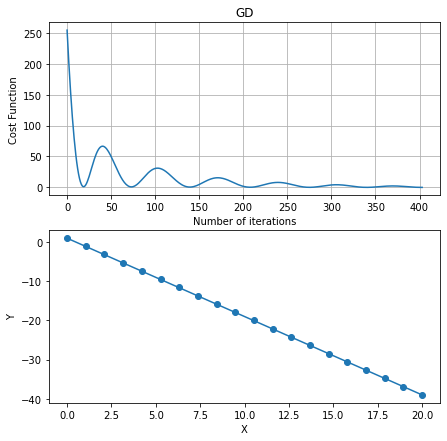

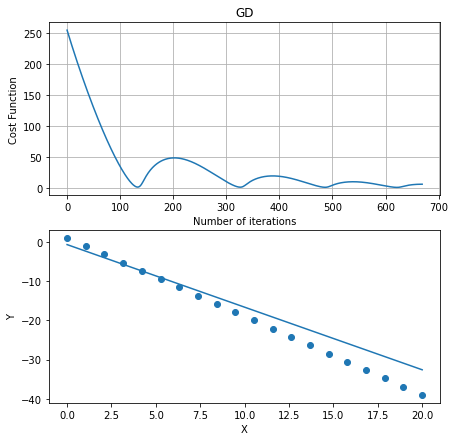

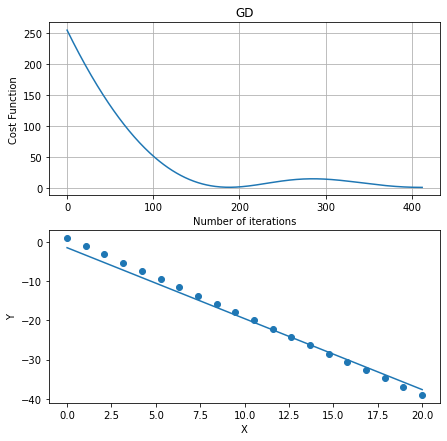

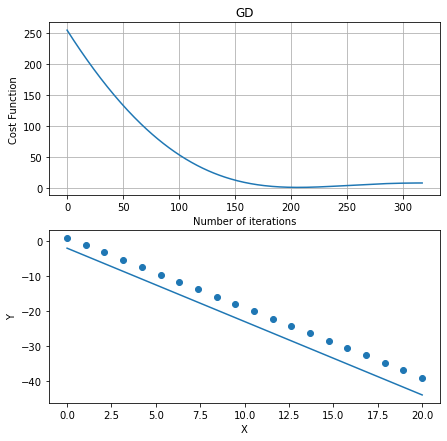

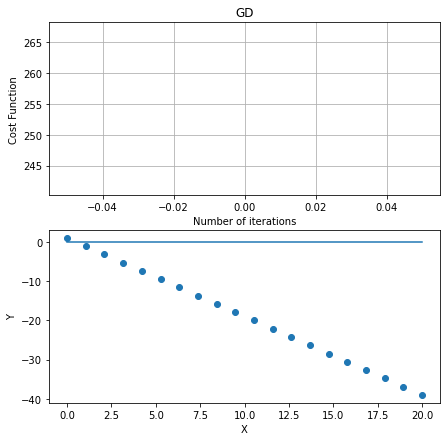

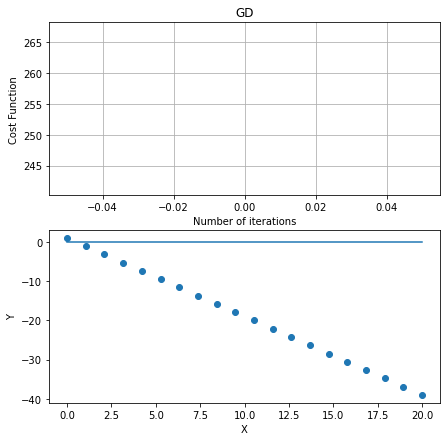

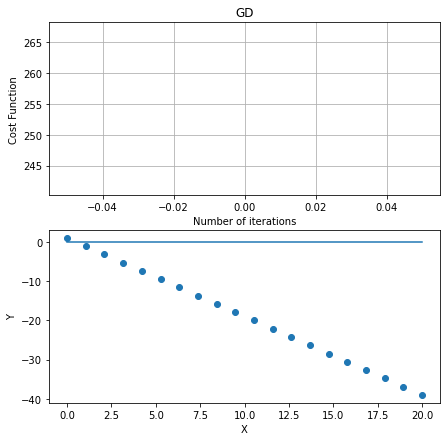

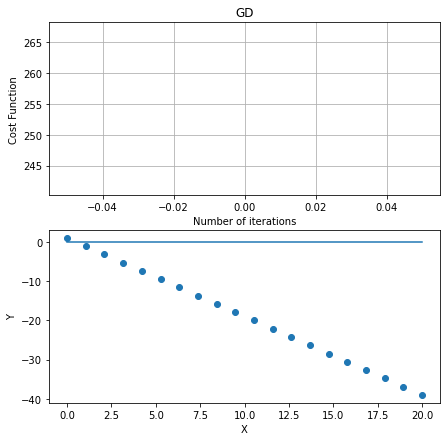

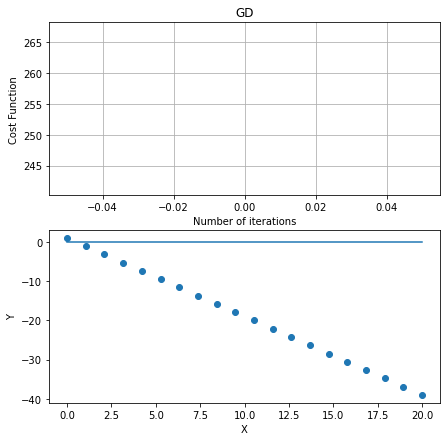

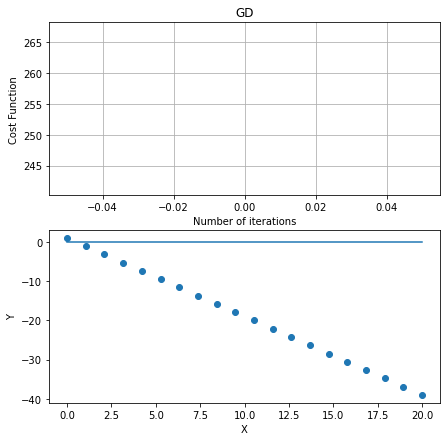

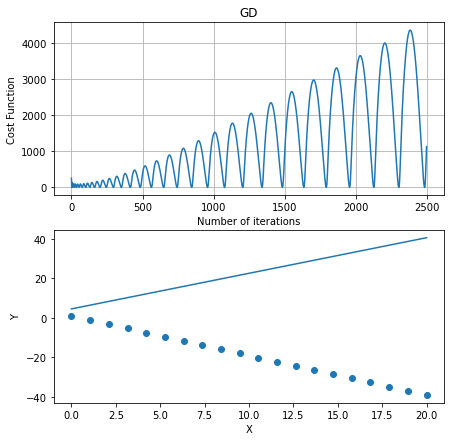

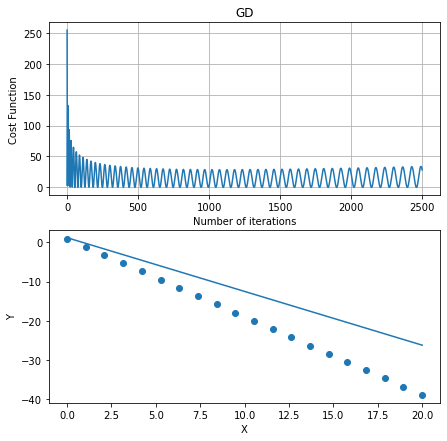

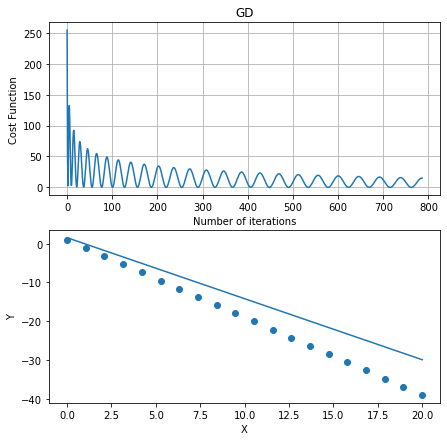

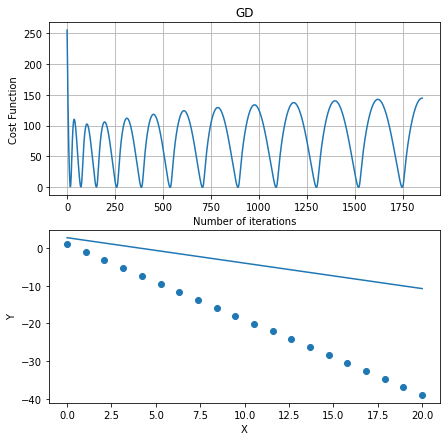

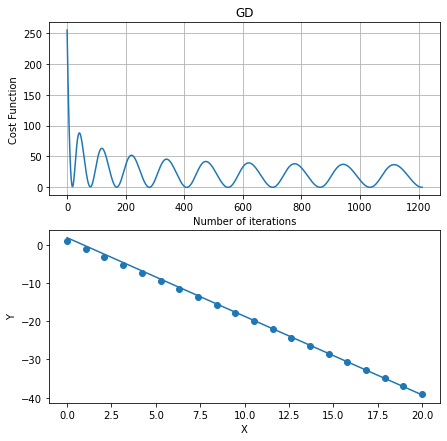

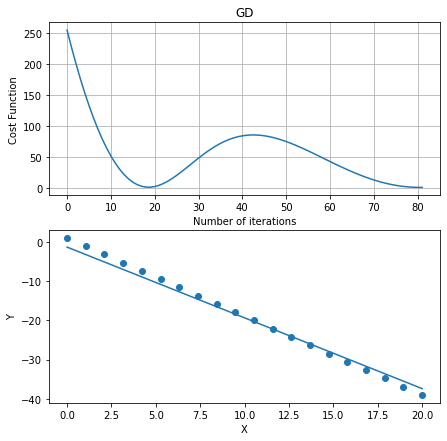

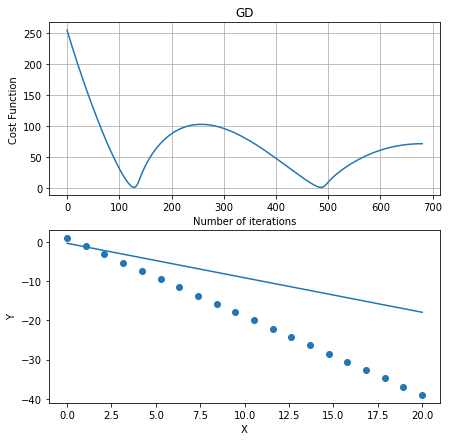

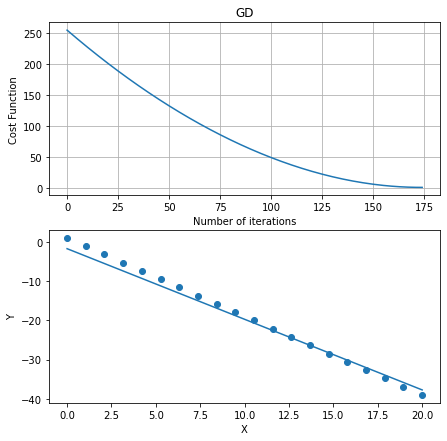

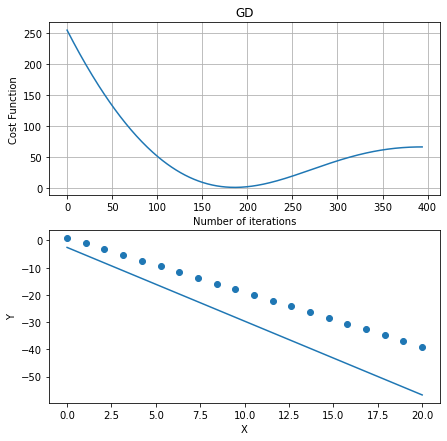

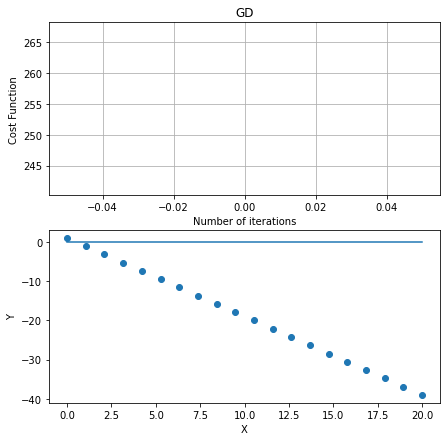

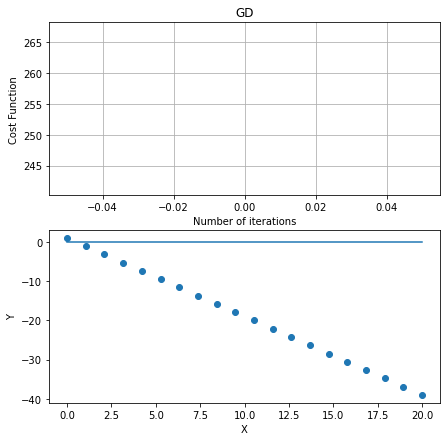

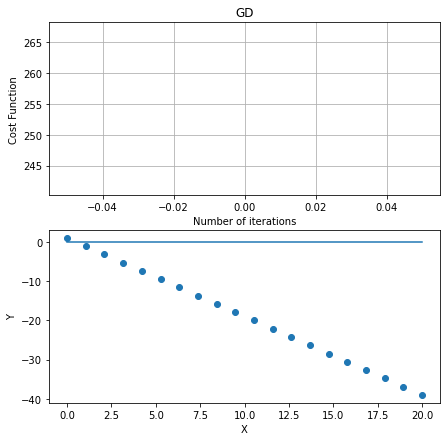

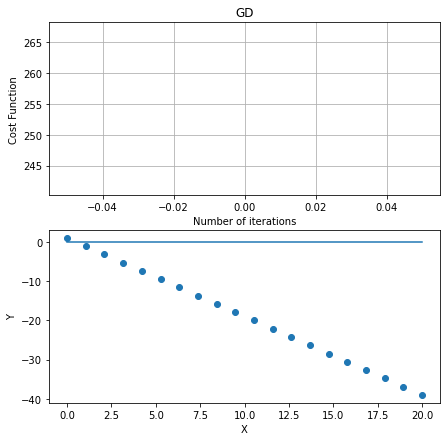

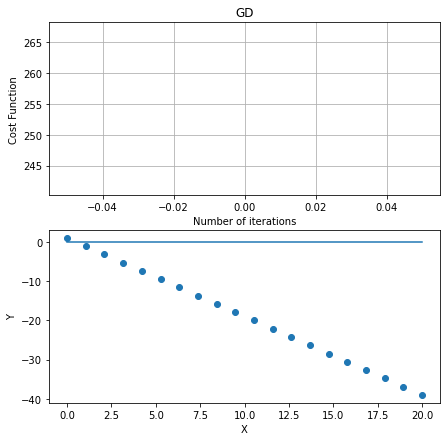

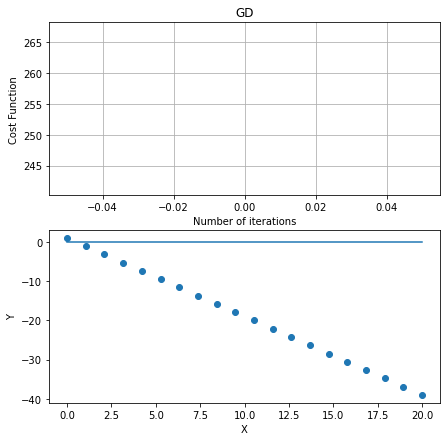

In [134]:
alphas = [1,0.1,0.01,0.001,0]
beta1s = [0.9,.99,.999]
beta2s = [0.9,.99,.999]
max_cost = 1000 
for beta1 in beta1s:
    for alpha in alphas:
        for beta2 in beta2s:
            the0,the1,theta_0,theta_1,cost,h = LR_Adam_single_variable(X,y,alpha,2500,epsilon,beta1,beta2)
            print("value of theta: ")
            print(the0,the1)
            y_pred_GD = x_c@thetas.T
            print('-----------------')
            print('cost function: ')
            costs = cost[-1]
            print(costs)
            print('*****************')
            print('*****************')
            if costs < max_cost:
                max_cost = costs
                best_beta1 = beta1
                best_beta2 = beta2
                best_alpha = alpha

In [130]:
print('max r2: ',max_r2,' best beta1 value: ',best_beta1,' best beta2 value: ',best_beta2,' best alpha value: ',best_alpha) 

max r2:  0.00018127475270840847  best beta1 value:  0.9  best beta2 value:  0.99  best alpha value:  1


cost = 0


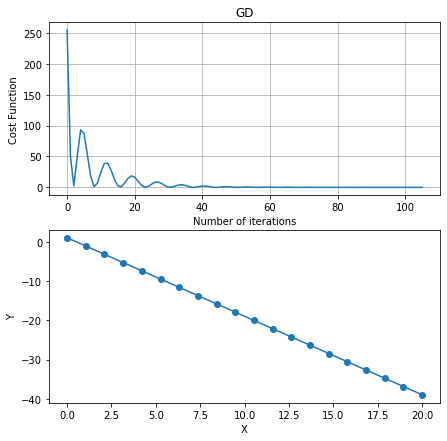

In [132]:
theta0,theta1,theta_0,theta_1,cost,h = LR_Adam_single_variable(X,y,best_alpha,2500,epsilon,best_beta1,best_beta2)

at thetas = -0.0009999999994736843 , -0.0009999999999620761
grad = 0

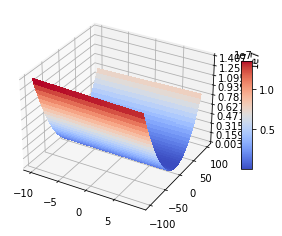

In [135]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
w1 = np.arange(-10, 10)
w2 = np.arange(-100, 100)
#b=np.arange(-100, 100)
w1, w2 = np.meshgrid(w1, w2)
cost=(1/3)*((150-(3*w1+10*w2))**2+(500-(5*w1+50*w2))**2+(625-(4*w1+25*w2))**2)
#cost=(1/3)*((150-3*w1+10*w2+b)**2+(500-5*w1+50*w2+b)**2+(625-4*w1+25*w2+b)**2)
# Plot the surface.
surf = ax.plot_surface(w1, w2, cost, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)


ax.zaxis.set_major_locator(LinearLocator(10))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=10)

plt.show()